In [2]:
import sys
import os
import math
import logging
import galsim
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect
import argparse
from IPython.display import clear_output
from numpy.random import random_sample
import matplotlib
from astropy.io import fits
from matplotlib.colors import LogNorm
import pickle

import pandas as pd
import seaborn as sns

import ngmix

import numpy as np
from numpy import array
from numpy.random import uniform as urand

from scipy.optimize import curve_fit
from scipy import stats

from matplotlib import colors, ticker, cm



In [3]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16

cmap = sns.color_palette("colorblind")

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["font.family"] = "Times New Roman"




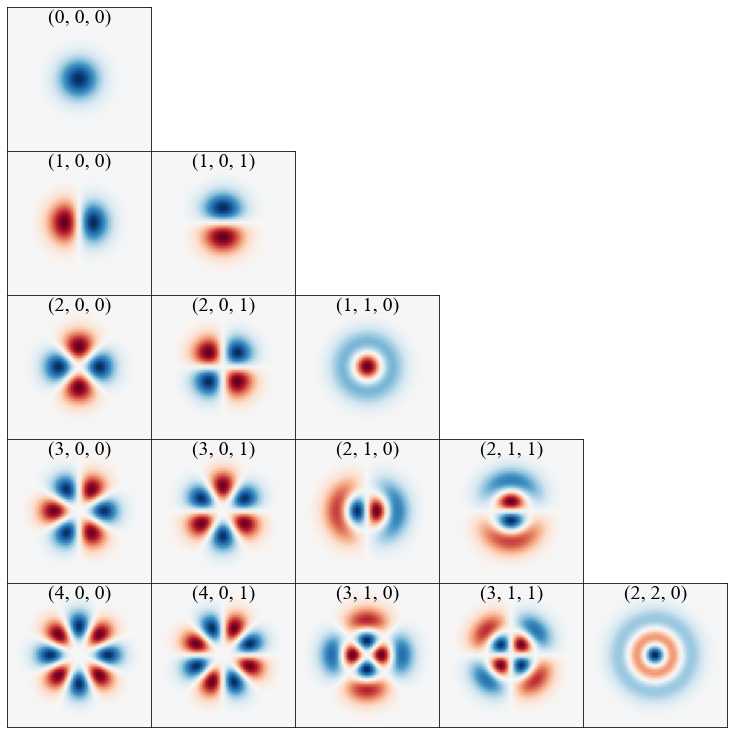

In [559]:
pqlist = [(0,0,0),(1,0,0),(1,0,1),(2,0,0),(2,0,1),(1,1,0),(3,0,0),(3,0,1),(2,1,0),(2,1,1),(4,0,0),(4,0,1),(3,1,0),(3,1,1),(2,2,0)]
fig = plt.figure(figsize = (10,10))
fig.subplots_adjust(left=-0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.0, hspace=0.0)
axes = []
for j in range(15):
    p,q,i = pqlist[j]
    bvec = np.zeros((15))
    bvec[j] = 0.1
    shapelet = galsim.Shapelet(0.5, 4, bvec)
    ax = plt.subplot(5,5,1+5*(p+q)+2*q+i)
    axes.append(ax)
    image_array = shapelet.drawImage(scale = 0.1, nx = 50, ny = 50).array
    vabs = np.max(np.abs(image_array))
    pcm = plt.imshow(image_array,cmap = 'RdBu', vmin = -vabs, vmax = vabs)
    plt.title(str((p,q,i)), y = 0.85, fontsize = 20)
    #plt.title(str(j))
    #plt.show()
    
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        direction = 'in',
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)

    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        direction = 'in',
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False)
    
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    #ax.axis('off')

plt.savefig('shapelet_basis.pdf',dpi = 300)

#fig.colorbar(axes)

In [560]:
with open('pickle/moment_basis.pkl','rb') as f:  # Python 3: open(..., 'rb')
    moments_profile_kol,fullpq = pickle.load(f)

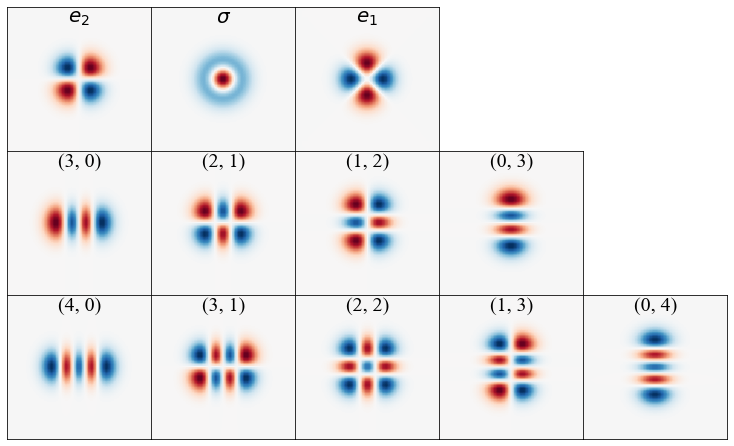

In [562]:
pqlist = [(2,0,0),(2,0,1),(1,1,0),(3,0,0),(3,0,1),(2,1,0),(2,1,1),(4,0,0),(4,0,1),(3,1,0),(3,1,1),(2,2,0)]
fig = plt.figure(figsize = (10,6))
fig.subplots_adjust(left=-0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.0, hspace=0.0)
axes = []
second_title = [r'$e_2$', r'$\sigma$',r'$e_1$']
for j in range(12):
    p,q,i = pqlist[j]
    ax = plt.subplot(3,5,1+5*(p+q)+2*q+i-10)
    
    image_array = moments_profile_kol[j][10:60, 10:60]
    vabs = np.max(np.abs(image_array))

    plt.imshow(image_array,cmap = 'RdBu', vmin = -vabs, vmax = vabs)
    if j<3:
        plt.title(second_title[j], y = 0.85,  fontsize = 20)
    else:
        plt.title(str((fullpq[j][1], fullpq[j][0])), y = 0.85,  fontsize = 20)
    
    
    
    
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        direction = 'in',
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)

    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        direction = 'in',
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False)
    
plt.savefig('moment_basis.pdf',dpi = 300)
plt.show()
#fig.colorbar(axes)

In [7]:
for i in range(12):
    p,q,i = pqlist[j]
    
    moment_i = moments_profile_kol[i]
    i_norm = np.sum(moment_i*moment_i)

    
    for j in range(i,12):
        moment_j = moments_profile_kol[j]
        j_norm = np.sum(moment_j*moment_j)

        
        print(i,j)
        print(np.sum(moment_i*moment_j)/np.sqrt(i_norm*j_norm))

0 0
1.0
0 1
0.001733653041900521
0 2
-3.0577971865520854e-06
0 3
-4.440965500888069e-06
0 4
3.656306143385065e-06
0 5
1.5878588988823623e-06
0 6
1.2329515501607068e-06
0 7
3.9882607664945256e-06
0 8
2.2208134967304397e-05
0 9
9.61321908556212e-06
0 10
1.6856559534181706e-05
0 11
8.208490198461804e-06
0 0
1.0
0 1
0.001733653041900521
0 2
-3.0577971865520854e-06
0 3
-4.440965500888069e-06
0 4
3.656306143385065e-06
0 5
1.5878588988823623e-06
0 6
1.2329515501607068e-06
0 7
3.9882607664945256e-06
0 8
2.2208134967304397e-05
0 9
9.61321908556212e-06
0 10
1.6856559534181706e-05
0 11
8.208490198461804e-06
0 0
1.0
0 1
0.001733653041900521
0 2
-3.0577971865520854e-06
0 3
-4.440965500888069e-06
0 4
3.656306143385065e-06
0 5
1.5878588988823623e-06
0 6
1.2329515501607068e-06
0 7
3.9882607664945256e-06
0 8
2.2208134967304397e-05
0 9
9.61321908556212e-06
0 10
1.6856559534181706e-05
0 11
8.208490198461804e-06
0 0
1.0
0 1
0.001733653041900521
0 2
-3.0577971865520854e-06
0 3
-4.440965500888069e-06
0 4
3.

In [650]:
with open('pickle/shear_response.pkl','rb') as f:  # Python 3: open(..., 'rb')
    pqlist,test2result = pickle.load(f)

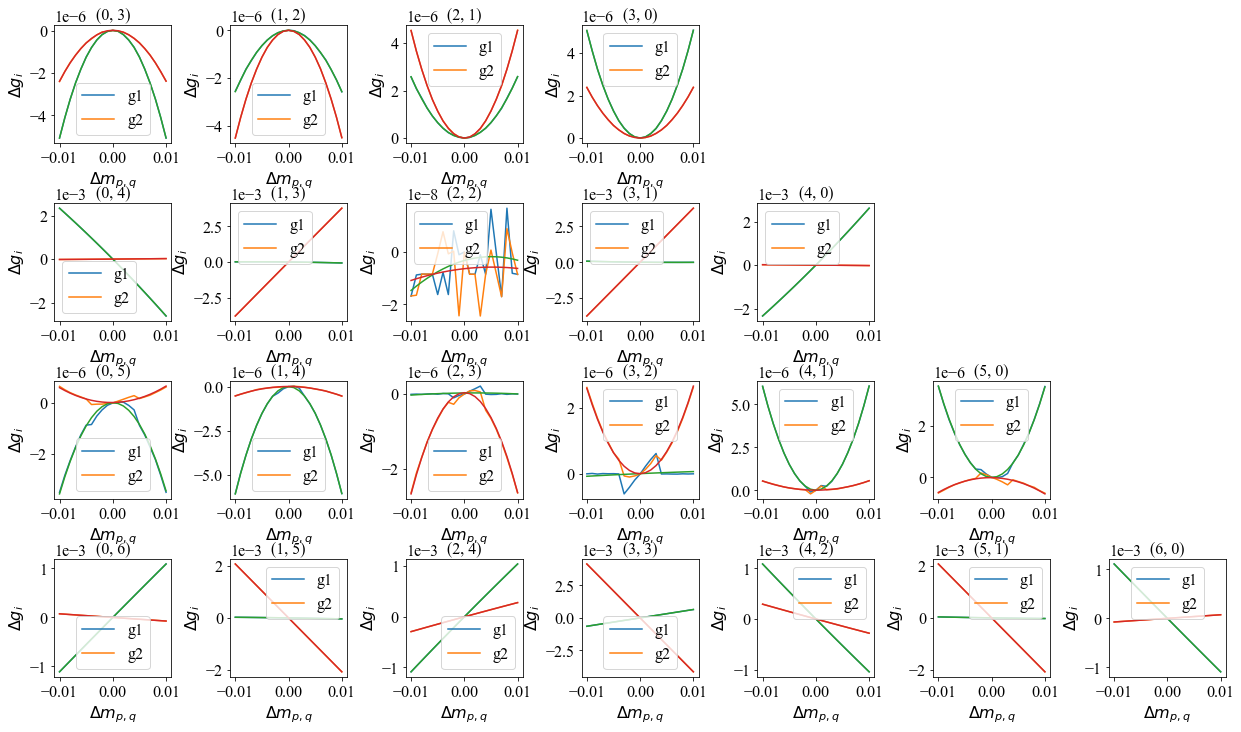

In [651]:
fig = plt.figure(figsize = (21,12))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

param1_dir = {}
param2_dir = {}


for j in range(22):
    p,q = pqlist[j][0],pqlist[j][1]
    n = p+q
    ax = plt.subplot(4,7,1+7*(n-3)+p)
    
    dm = np.array([t['dm'][j+3] for t in test2result[j]])
    dg1 = np.array([t["abs_bias"][0] for t in test2result[j]])
    dg2 = np.array([t["abs_bias"][1] for t in test2result[j]])
    
    params1= np.polyfit(dm,dg1,2)
    params2= np.polyfit(dm,dg2,2)
    
#     print params1
    
    
    plt.plot(dm,dg1,label='g1')
    plt.plot(dm,dg2,label='g2')

    dg1_project = params1[2] + dm*params1[1] + dm**2*params1[0]
    dg2_project = params2[2] + dm*params2[1] + dm**2*params2[0]
    
    
    plt.plot(dm,dg1_project)
    plt.plot(dm,dg2_project)
    
    param1_dir[(p,q)] = params1
    param2_dir[(p,q)] = params2
    #print test4_gaussian_results[j][0]['psf_bvec'][:15]/test4_gaussian_results[j][0]['psf_bvec'][0]
    plt.ticklabel_format(axis='y',style='sci',scilimits=(0,3))

    plt.xlabel(r"$\Delta m_{p,q}$")
    plt.ylabel(r'$\Delta g_i$')
    
    
    
    plt.title(str((p,q)))
    #plt.show()
    plt.legend()
    
#fig.colorbar(axes)

In [652]:
y_range = {}
for j in range(22):
    p,q = pqlist[j][0],pqlist[j][1]
    n = p+q
    
    if n not in y_range.keys():
        y_range[n] = [0,0]
    #print min(min(np.array([t["abs_bias"][0] for t in test13result[j]])/0.005),y_range[n][0])
    y_range[n][0] = min(min(np.array([t["abs_bias"][0] for t in test2result[j]]))*1.1,y_range[n][0])
    y_range[n][0] = min(min(np.array([t["abs_bias"][1] for t in test2result[j]]))*1.1,y_range[n][0])
    y_range[n][0] = min(min(np.array([t["abs_bias"][0] for t in test2result[j]]))*1.1,y_range[n][0])
    y_range[n][0] = min(min(np.array([t["abs_bias"][1] for t in test2result[j]]))*1.1,y_range[n][0])
    
    y_range[n][1] = max(max(np.array([t["abs_bias"][0] for t in test2result[j]]))*1.1,y_range[n][1])
    y_range[n][1] = max(max(np.array([t["abs_bias"][1] for t in test2result[j]]))*1.1,y_range[n][1])
    y_range[n][1] = max(max(np.array([t["abs_bias"][0] for t in test2result[j]]))*1.1,y_range[n][1])
    y_range[n][1] = max(max(np.array([t["abs_bias"][1] for t in test2result[j]]))*1.1,y_range[n][1])
    

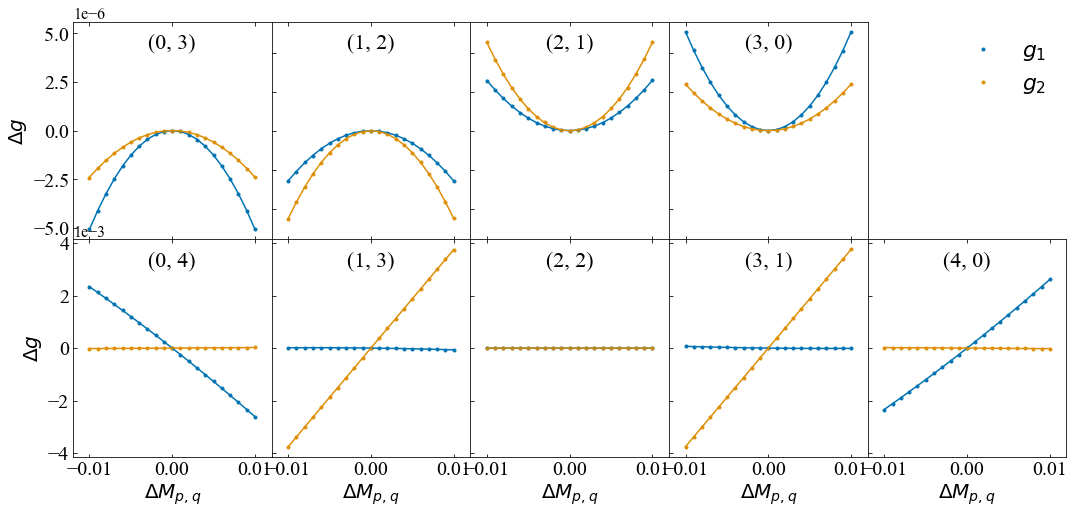

In [653]:


fig = plt.figure(figsize = (15,8))
fig.subplots_adjust(left=0.06, bottom=None, right=0.98, top=None, wspace=0.0, hspace=0.0)

# f, axes = plt.subplots(4, 7, sharex='col', sharey='row', figsize=(21,12))
# f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.0)




for j in range(9):
    p,q = pqlist[j][0],pqlist[j][1]
    n = p+q
    #print n
    ax = plt.subplot(2,5,1+5*(n-3)+p)
    
    
    dm = np.array([t['dm'][j+3] for t in test2result[j]])
    dg1 = np.array([t["abs_bias"][0] for t in test2result[j]])
    dg2 = np.array([t["abs_bias"][1] for t in test2result[j]])
    
    params1= np.polyfit(dm,dg1,2)
    params2= np.polyfit(dm,dg2,2)
    
    
    plt.plot(dm,dg1,'.',label='g1',color =cmap[0])
    plt.plot(dm,dg2,'.',label='g2',color =cmap[1])
    
    dg1_project = params1[2] + dm*params1[1] + dm**2*params1[0]
    dg2_project = params2[2] + dm*params2[1] + dm**2*params2[0]
    
    
    plt.plot(dm,dg1_project,color =cmap[0])
    plt.plot(dm,dg2_project,color =cmap[1])
    

#     plt.plot(np.array([t['gal_hlr']/t['psf_hlr'] for t in test132result[j]]),np.array([t["abs_bias"][0] for t in test131result[j]])/0.005,'.-',color = 'blue')
#     plt.plot(np.array([t['gal_hlr']/t['psf_hlr'] for t in test132result[j]]),np.array([t["abs_bias"][1] for t in test131result[j]])/0.005,'.-',color = 'orange')
    
    
    #print test4_gaussian_results[j][0]['psf_bvec'][:15]/test4_gaussian_results[j][0]['psf_bvec'][0]
    
    
    
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        direction = 'in',
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=True,         # ticks along the top edge are off
        labelbottom=False)
    
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        direction = 'in',
        which='both',      # both major and minor ticks are affected
        left=True,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False)
    
    #ax.tick_params(axis="y",direction="in")
    
    
    
    if j in list(range(4,9)):
        plt.xlabel(r"$\Delta M_{p,q}$", fontsize = 20)
        ax.tick_params(
            axis='x',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=True,         # ticks along the top edge are off
            labelbottom=True,
            labelsize = 20)
    if j in [0,4,9,15]:
        plt.ylabel(r'$\Delta g$', fontsize = 20)
        ax.ticklabel_format(axis='y',style='scientific',scilimits=(0,3))
        ax.tick_params(
            axis='y',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            left=True,      # ticks along the bottom edge are off
            right=False,         # ticks along the top edge are off
            labelleft=True,
            labelsize = 20)
    
    plt.ylim(y_range[n])
    plt.xlim([-0.012, 0.012])
    
    plt.title(str((p,q)),y = 0.85, fontsize = 22)
    #plt.show()
    #plt.legend([])
    

plt.subplot(2,5,5,frame_on = False)
plt.plot([],[],'.',color = cmap[0],label = r'$g_1$')
plt.plot([],[],'.',color = cmap[1],label = r'$g_2$')
# plt.plot([0],[0],'--',color =cmap[0],label = r'Sersic n = 3.0 $g_1$')
# plt.plot([0],[0],'--',color = cmap[1],label = r'Sersic n = 3.0 $g_2$')
plt.axis('off')
plt.legend(frameon = False, fontsize = 22)

plt.savefig('shear_response.pdf',dpi = 300)
    
#fig.colorbar(axes)

In [576]:
with open('pickle/add_and_mul.pkl','rb') as f:  # Python 3: open(..., 'rb')
    pqlist,test3result,test3_init = pickle.load(f)

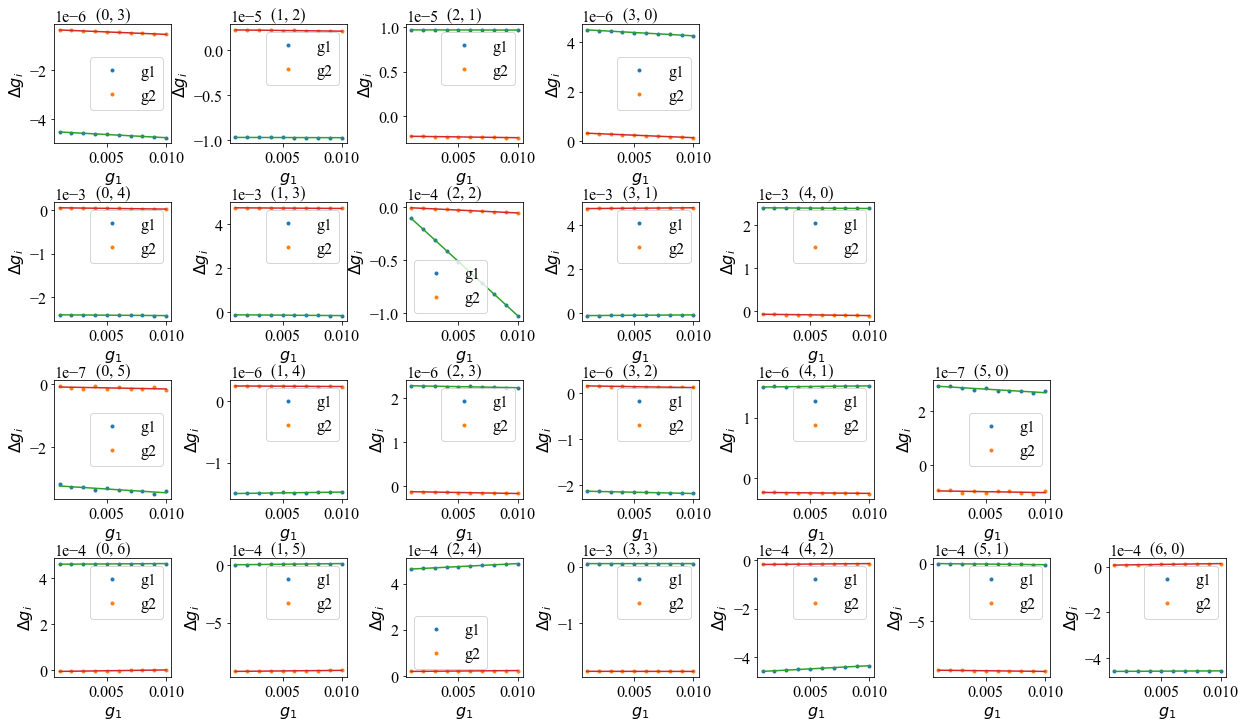

In [577]:
fig = plt.figure(figsize = (21,12))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

g1_m = [];g1_c = [];g2_m = [];g2_c = []


for j in range(22):
    p,q = pqlist[j][0],pqlist[j][1]
    n = p+q
    ax = plt.subplot(4,7,1+7*(n-3)+p)
    
    g1 = np.array([param[4] for param in test3_init])
    g2 = np.array([param[5] for param in test3_init])
    
    dg1 = np.array([t["abs_bias"][0] for t in test3result[j]])
    dg2 = np.array([t["abs_bias"][1] for t in test3result[j]])
    
    params1= np.polyfit(g1,dg1,1)
    params2= np.polyfit(g2,dg2,1)
    
    g1_m.append(params1[0]);g1_c.append(params1[1]);g2_m.append(params2[0]);g2_c.append(params2[1])
    
    #print params1,params2
    
    dg1_project = params1[1] + g1*params1[0] 
    dg2_project = params2[1] + g2*params2[0] 
    
    plt.plot(g1,dg1,'.',label='g1')
    plt.plot(g2,dg2,'.',label='g2')
    
    plt.plot(g1,dg1_project)
    plt.plot(g2,dg2_project)
    
    
    
    
    plt.ticklabel_format(axis='y',style='sci',scilimits=(0,3))

    #print test4_gaussian_results[j][0]['psf_bvec'][:15]/test4_gaussian_results[j][0]['psf_bvec'][0]
    
    plt.xlabel(r"$g_1$")
    plt.ylabel(r'${\Delta g_i}$')
    
    plt.title(str((p,q)))
    #plt.show()
    plt.legend()
    
#fig.colorbar(axes)

In [578]:
y_range = {}
for j in range(22):
    p,q = pqlist[j][0],pqlist[j][1]
    n = p+q
    
    if n not in y_range.keys():
        y_range[n] = [0,0]
    #print min(min(np.array([t["abs_bias"][0] for t in test13result[j]])/0.005),y_range[n][0])
    y_range[n][0] = min(min(np.array([t["abs_bias"][0] for t in test3result[j]]))*1.1,y_range[n][0])
    y_range[n][0] = min(min(np.array([t["abs_bias"][1] for t in test3result[j]]))*1.1,y_range[n][0])
    y_range[n][0] = min(min(np.array([t["abs_bias"][0] for t in test3result[j]]))*1.1,y_range[n][0])
    y_range[n][0] = min(min(np.array([t["abs_bias"][1] for t in test3result[j]]))*1.1,y_range[n][0])
    
    y_range[n][1] = max(max(np.array([t["abs_bias"][0] for t in test3result[j]]))*1.1,y_range[n][1])
    y_range[n][1] = max(max(np.array([t["abs_bias"][1] for t in test3result[j]]))*1.1,y_range[n][1])
    y_range[n][1] = max(max(np.array([t["abs_bias"][0] for t in test3result[j]]))*1.1,y_range[n][1])
    y_range[n][1] = max(max(np.array([t["abs_bias"][1] for t in test3result[j]]))*1.1,y_range[n][1])
    

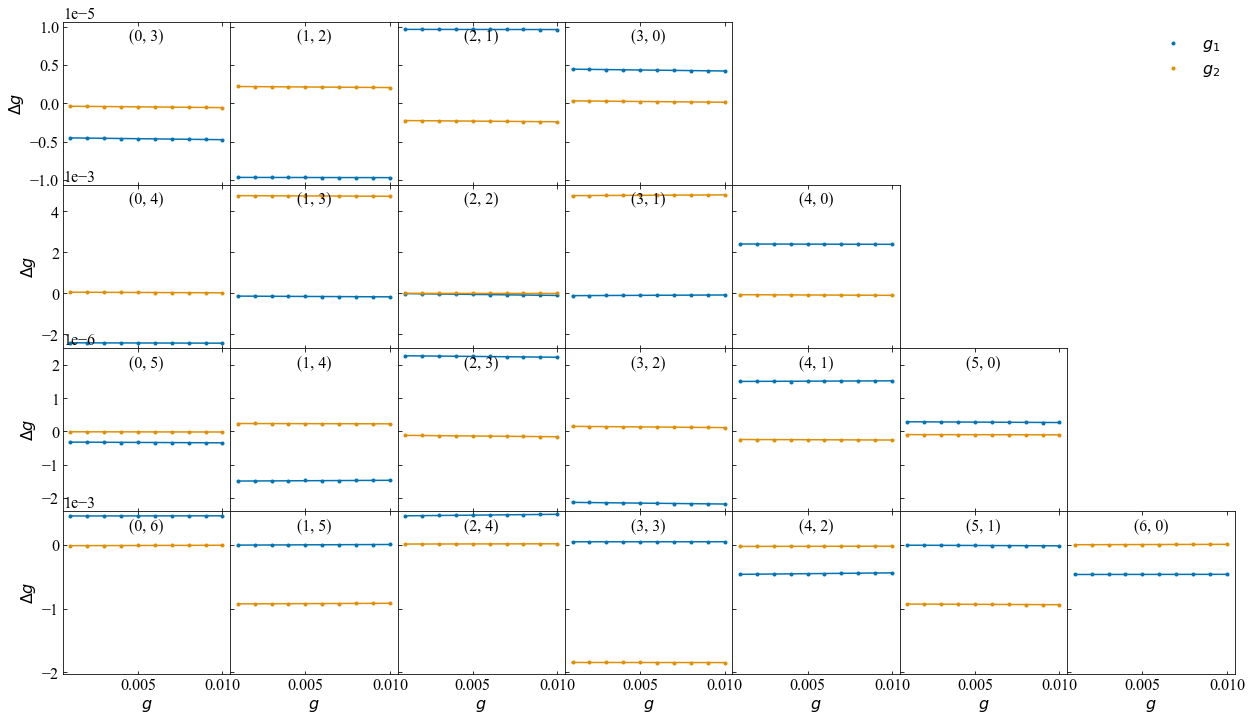

In [579]:


fig = plt.figure(figsize = (21,12))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.0)

# f, axes = plt.subplots(4, 7, sharex='col', sharey='row', figsize=(21,12))
# f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.0)




for j in range(22):
    p,q = pqlist[j][0],pqlist[j][1]
    n = p+q
    #print n
    ax = plt.subplot(4,7,1+7*(n-3)+p)
    
    g1 = np.array([param[4] for param in test3_init])
    g2 = np.array([param[5] for param in test3_init])
    
    dg1 = np.array([t["abs_bias"][0] for t in test3result[j]])
    dg2 = np.array([t["abs_bias"][1] for t in test3result[j]])
    
    params1= np.polyfit(g1,dg1,1)
    params2= np.polyfit(g2,dg2,1)
    
    g1_m.append(params1[0]);g1_c.append(params1[1]);g2_m.append(params2[0]);g2_c.append(params2[1])
    
    #print params1,params2
    
    dg1_project = params1[1] + g1*params1[0] 
    dg2_project = params2[1] + g2*params2[0] 
    
    plt.plot(g1,dg1,'.',label='g1',color = cmap[0])
    plt.plot(g2,dg2,'.',label='g2',color = cmap[1])
    
    plt.plot(g1,dg1_project,color = cmap[0])
    plt.plot(g2,dg2_project,color = cmap[1])
    
    

#     plt.plot(np.array([t['gal_hlr']/t['psf_hlr'] for t in test132result[j]]),np.array([t["abs_bias"][0] for t in test131result[j]])/0.005,'.-',color = 'blue')
#     plt.plot(np.array([t['gal_hlr']/t['psf_hlr'] for t in test132result[j]]),np.array([t["abs_bias"][1] for t in test131result[j]])/0.005,'.-',color = 'orange')
    
    
    #print test4_gaussian_results[j][0]['psf_bvec'][:15]/test4_gaussian_results[j][0]['psf_bvec'][0]
    
    
    
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        direction = 'in',
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=True,         # ticks along the top edge are off
        labelbottom=False)
    
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        direction = 'in',
        which='both',      # both major and minor ticks are affected
        left=True,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False)
    
    #ax.tick_params(axis="y",direction="in")
    
    
    
    if j in list(range(15,22)):
        plt.xlabel(r"$g$")
        ax.tick_params(
            axis='x',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=True,         # ticks along the top edge are off
            labelbottom=True)
    if j in [0,4,9,15]:
        plt.ylabel(r'$\Delta g$')
        plt.ticklabel_format(axis='y',style='scientific',scilimits=(0,3))
        ax.tick_params(
            axis='y',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            left=True,      # ticks along the bottom edge are off
            right=False,         # ticks along the top edge are off
            labelleft=True)
    
    plt.ylim(y_range[n])
    
    plt.title(str((p,q)),y = 0.85)
    #plt.show()
    #plt.legend([])
    

plt.subplot(4,7,7,frame_on = False)
plt.plot([],[],'.',color = cmap[0],label = r'$g_1$')
plt.plot([],[],'.',color = cmap[1],label = r'$g_2$')
# plt.plot([0],[0],'--',color =cmap[0],label = r'Sersic n = 3.0 $g_1$')
# plt.plot([0],[0],'--',color = cmap[1],label = r'Sersic n = 3.0 $g_2$')
plt.axis('off')
plt.legend(frameon = False)

plt.savefig('additive_multiplicative.pdf',dpi = 300)
    
#fig.colorbar(axes)

In [580]:
with open('pickle/add_size_ratio.pkl','rb') as f:  # Python 3: open(..., 'rb')
    pqlist,test13result,test13_init, test131result, test131_init = pickle.load(f)

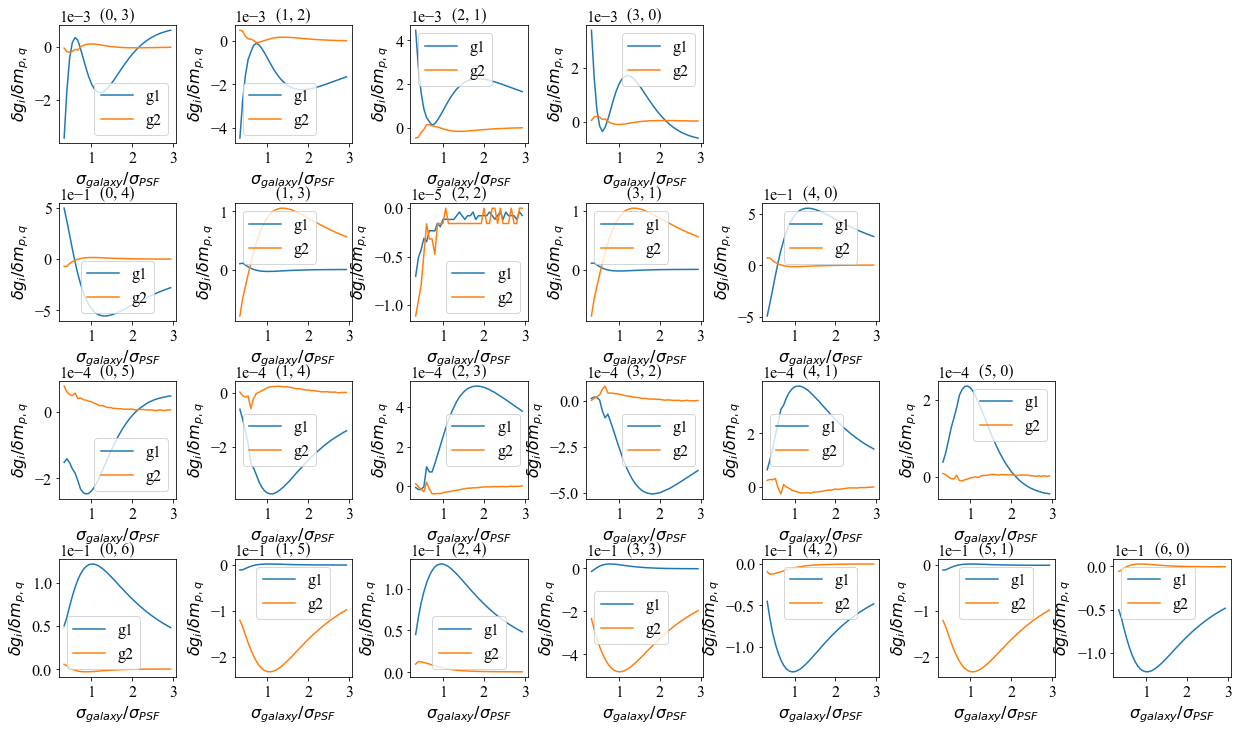

In [581]:
spine_list1 = []
spine_list2 = []
pq4nersc = []

fig = plt.figure(figsize = (21,12))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
for j in range(22):
    p,q = pqlist[j][0],pqlist[j][1]
    n = p+q
    ax = plt.subplot(4,7,1+7*(n-3)+p)
    
    size_ratio = np.array([t['gal_sigma']/t['psf_sigma'] for t in test13result[j]])
    dg1 = np.array([t["abs_bias"][0] for t in test13result[j]])/0.005
    dg2 = np.array([t["abs_bias"][1] for t in test13result[j]])/0.005
    
    plt.plot(size_ratio,dg1,label='g1')
    plt.plot(size_ratio,dg2,label='g2')
    
    #print test4_gaussian_results[j][0]['psf_bvec'][:15]/test4_gaussian_results[j][0]['psf_bvec'][0]
    plt.ticklabel_format(axis='y',style='sci',scilimits=(0,3))
    
    spine_list1.append(dg1)
    spine_list2.append(dg2)
    pq4nersc.append([p,q])
    
    
    
 
    plt.xlabel(r"$\sigma_{galaxy}/\sigma_{PSF}$")
    plt.ylabel(r'$\delta g_i / \delta m_{p,q}$')
    
    plt.title(str((p,q)))
    #plt.show()
    plt.legend()
    
#fig.colorbar(axes)

In [582]:
y_range = {}
for j in range(22):
    p,q = pqlist[j][0],pqlist[j][1]
    n = p+q
    
    if n not in y_range.keys():
        y_range[n] = [0,0]
    #print min(min(np.array([t["abs_bias"][0] for t in test13result[j]])/0.005),y_range[n][0])
    y_range[n][0] = min(min(np.array([t["abs_bias"][0] for t in test13result[j]]))*1.1/0.005,y_range[n][0])
    y_range[n][0] = min(min(np.array([t["abs_bias"][1] for t in test13result[j]]))*1.1/0.005,y_range[n][0])
    y_range[n][0] = min(min(np.array([t["abs_bias"][0] for t in test131result[j]]))*1.1/0.005,y_range[n][0])
    y_range[n][0] = min(min(np.array([t["abs_bias"][1] for t in test131result[j]]))*1.1/0.005,y_range[n][0])
    
    y_range[n][1] = max(max(np.array([t["abs_bias"][0] for t in test13result[j]]))*1.1/0.005,y_range[n][1])
    y_range[n][1] = max(max(np.array([t["abs_bias"][1] for t in test13result[j]]))*1.1/0.005,y_range[n][1])
    y_range[n][1] = max(max(np.array([t["abs_bias"][0] for t in test131result[j]]))*1.1/0.005,y_range[n][1])
    y_range[n][1] = max(max(np.array([t["abs_bias"][1] for t in test131result[j]]))*1.1/0.005,y_range[n][1])
    

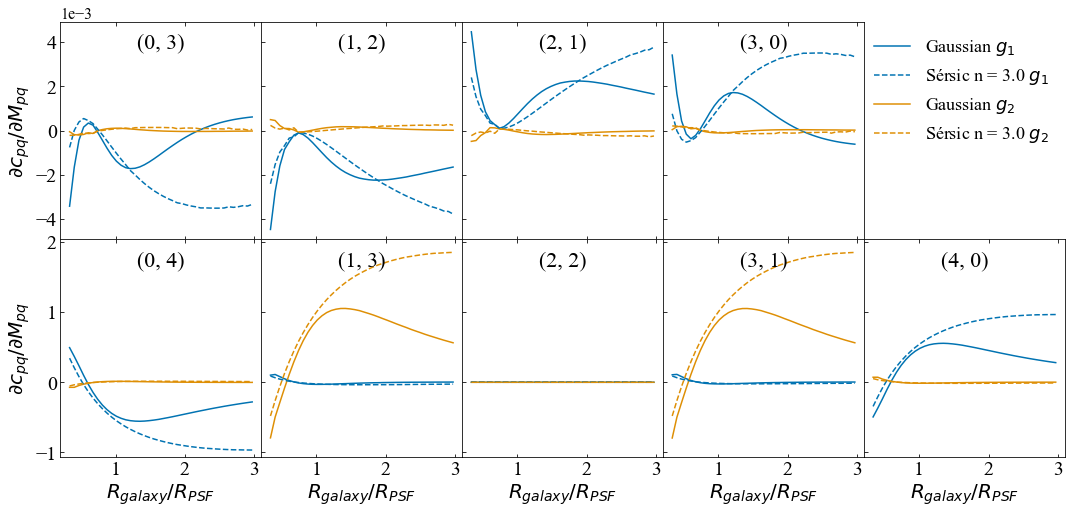

In [584]:


fig = plt.figure(figsize = (15,8))
fig.subplots_adjust(left=0.05, bottom=None, right=0.98, top=None, wspace=0.0, hspace=0.0)

# f, axes = plt.subplots(4, 7, sharex='col', sharey='row', figsize=(21,12))
# f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.0)




for j in range(9):
    p,q = pqlist[j][0],pqlist[j][1]
    n = p+q
    #print n
    ax = plt.subplot(2,5,1+5*(n-3)+p)
    
    size_ratio = np.array([t['gal_hlr']/t['psf_hlr'] for t in test13result[j]])
    dg1 = np.array([t["abs_bias"][0] for t in test13result[j]])/0.005
    dg2 = np.array([t["abs_bias"][1] for t in test13result[j]])/0.005
    #print params1,params2
    plt.plot(size_ratio,dg1,color = cmap[0])
    plt.plot(size_ratio,dg2,color = cmap[1])
    
    dg1_sersic = np.array([t["abs_bias"][0] for t in test131result[j]])/0.005
    dg2_sersic = np.array([t["abs_bias"][1] for t in test131result[j]])/0.005
    #print params1,params2
    plt.plot(size_ratio,dg1_sersic, '--',color = cmap[0])
    plt.plot(size_ratio,dg2_sersic, '--',color = cmap[1])
    
    

#     plt.plot(np.array([t['gal_hlr']/t['psf_hlr'] for t in test132result[j]]),np.array([t["abs_bias"][0] for t in test131result[j]])/0.005,'.-',color = 'blue')
#     plt.plot(np.array([t['gal_hlr']/t['psf_hlr'] for t in test132result[j]]),np.array([t["abs_bias"][1] for t in test131result[j]])/0.005,'.-',color = 'orange')
    
    
    #print test4_gaussian_results[j][0]['psf_bvec'][:15]/test4_gaussian_results[j][0]['psf_bvec'][0]
    
    
    
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        direction = 'in',
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=True,         # ticks along the top edge are off
        labelbottom=False)
    
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        direction = 'in',
        which='both',      # both major and minor ticks are affected
        left=True,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False)
    
    #ax.tick_params(axis="y",direction="in")
    
    
    
    if j in list(range(4,9)):
        plt.xlabel(r"$R_{galaxy}/R_{PSF}$", fontsize = 20)
        plt.xticks(fontsize = 20)
        ax.tick_params(
            axis='x',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=True,         # ticks along the top edge are off
            labelbottom=True,
            labelsize = 20)
    if j in [0,4,9,15]:
        plt.ylabel(r'$\partial c_{pq} / \partial M_{pq}$', fontsize = 20)
        plt.ticklabel_format(axis='y',style='scientific',scilimits=(0,3))
        #plt.yticks(fontsize = 25)
        ax.tick_params(
            axis='y',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            left=True,      # ticks along the bottom edge are off
            right=False,         # ticks along the top edge are off
            labelleft=True,
            labelsize = 20)
    
    plt.ylim(y_range[n])
    
    plt.title(str((p,q)),y = 0.85, fontsize = 22)
    #plt.show()
    #plt.legend([])
    

plt.subplot(2,5,5,frame_on = False)
plt.plot([],[],color = cmap[0],label = r'Gaussian $g_1$')
plt.plot([0],[0],'--',color =cmap[0],label = r'Sérsic n = 3.0 $g_1$')
plt.plot([],[],color = cmap[1],label = r'Gaussian $g_2$')

plt.plot([0],[0],'--',color = cmap[1],label = r'Sérsic n = 3.0 $g_2$')
plt.axis('off')
plt.legend(fontsize = 18,frameon = False)

plt.savefig('additive_size_ratio.pdf',dpi = 300)
    
#fig.colorbar(axes)

In [585]:
with open('pickle/mul_size_ratio.pkl','rb') as f:  # Python 3: open(..., 'rb')
    pqlist,test17result,test171result  = pickle.load(f)

In [586]:
size_ratio_ser = np.zeros(shape = (40))
m1_size_ser = np.zeros(shape = (22,40))
m2_size_ser = np.zeros(shape = (22,40))

for i in range(40):
    size_ratio_ser[i] = test171result[0][i]['gal_hlr']/test171result[0][i]['psf_hlr']
    for j in range(22):
        m1_size_ser[j][i] = (test171result[j][i+40]['abs_bias'][0] - test171result[j][i]['abs_bias'][0])/0.01/0.005
        m2_size_ser[j][i] = (test171result[j][i+80]['abs_bias'][1] - test171result[j][i]['abs_bias'][1])/0.01/0.005
        
size_ratio_gau = np.zeros(shape = (40))
m1_size_gau = np.zeros(shape = (22,40))
m2_size_gau = np.zeros(shape = (22,40))

for i in range(40):
    size_ratio_gau[i] = test17result[0][i]['gal_hlr']/test17result[0][i]['psf_hlr']
    for j in range(22):
        m1_size_gau[j][i] = (test17result[j][i+40]['abs_bias'][0] - test17result[j][i]['abs_bias'][0])/0.01/0.005
        m2_size_gau[j][i] = (test17result[j][i+80]['abs_bias'][1] - test17result[j][i]['abs_bias'][1])/0.01/0.005
        
y_range_15 = {}
for j in range(22):
    p,q = pqlist[j][0],pqlist[j][1]
    n = p+q
    
    if n not in y_range_15.keys():
        y_range_15[n] = [0,0]
    #print min(min(np.array([t["abs_bias"][0] for t in test13result[j]])/0.005),y_range[n][0])
    y_range_15[n][0] = min(min(m1_size_gau[j]*1.1),y_range_15[n][0])
    y_range_15[n][0] = min(min(m2_size_gau[j]*1.1),y_range_15[n][0])
    y_range_15[n][0] = min(min(m1_size_ser[j]*1.1),y_range_15[n][0])
    y_range_15[n][0] = min(min(m2_size_ser[j]*1.1),y_range_15[n][0])
    
    y_range_15[n][1] = max(max(m1_size_gau[j]*1.1),y_range_15[n][1])
    y_range_15[n][1] = max(max(m2_size_gau[j]*1.1),y_range_15[n][1])
    y_range_15[n][1] = max(max(m1_size_ser[j]*1.1),y_range_15[n][1])
    y_range_15[n][1] = max(max(m2_size_ser[j]*1.1),y_range_15[n][1])
    

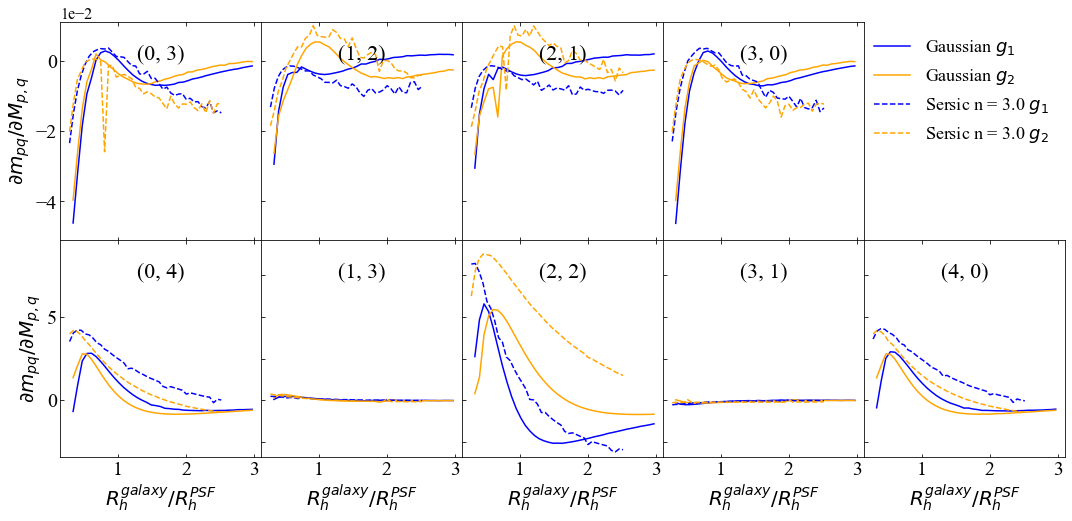

In [587]:


fig = plt.figure(figsize = (15,8))
fig.subplots_adjust(left=0.05, bottom=None, right=0.98, top=None, wspace=0.0, hspace=0.0)

# f, axes = plt.subplots(4, 7, sharex='col', sharey='row', figsize=(21,12))
# f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.0)




for j in range(9):
    p,q = pqlist[j][0],pqlist[j][1]
    n = p+q
    #print n
    ax = plt.subplot(2,5,1+5*(n-3)+p)
    
    
    
    
    plt.plot(size_ratio_gau,m1_size_gau[j],color = 'blue',label = r'Gaussian $g_1$')
    plt.plot(size_ratio_gau,m2_size_gau[j],color = 'orange',label = r'Gaussian $g_2$')
    
    
    plt.plot(size_ratio_ser,m1_size_ser[j],'--',color = 'blue',label = r'S\'ersic $g_1$')
    plt.plot(size_ratio_ser,m2_size_ser[j],'--',color = 'orange',label = r'S\'ersic $g_2$')
#     plt.plot(np.array([t['gal_hlr']/t['psf_hlr'] for t in test132result[j]]),np.array([t["abs_bias"][0] for t in test131result[j]])/0.005,'.-',color = 'blue')
#     plt.plot(np.array([t['gal_hlr']/t['psf_hlr'] for t in test132result[j]]),np.array([t["abs_bias"][1] for t in test131result[j]])/0.005,'.-',color = 'orange')
    
    
    #print test4_gaussian_results[j][0]['psf_bvec'][:15]/test4_gaussian_results[j][0]['psf_bvec'][0]
    
    
    
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        direction = 'in',
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=True,         # ticks along the top edge are off
        labelbottom=False)
    
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        direction = 'in',
        which='both',      # both major and minor ticks are affected
        left=True,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False)
    
    #ax.tick_params(axis="y",direction="in")
    
    
    
    if j in list(range(4,9)):
        plt.xlabel(r"$R_h^{galaxy}/R_h^{PSF}$", fontsize = 20)
        ax.tick_params(
            axis='x',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=True,         # ticks along the top edge are off
            labelbottom=True,
            labelsize = 20)
    if j in [0,4,9,15]:
        plt.ylabel(r'$\partial m_{pq} / \partial M_{p,q}$', fontsize = 20)
        plt.ticklabel_format(axis='y',style='scientific',scilimits=(0,3))
        ax.tick_params(
            axis='y',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            left=True,      # ticks along the bottom edge are off
            right=False,         # ticks along the top edge are off
            labelleft=True,
            labelsize = 20)
    
    plt.ylim(y_range_15[n])
    
    plt.title(str((p,q)),y = 0.8, fontsize = 22)
    #plt.show()
    #plt.legend([])
    

plt.subplot(4,7,7,frame_on = False)
plt.plot([0],[0],color = 'blue',label = r'Gaussian $g_1$')
plt.plot([0],[0],color = 'orange',label = r'Gaussian $g_2$')
plt.plot([0],[0],'--',color = 'blue',label = r'Sersic n = 3.0 $g_1$')
plt.plot([0],[0],'--',color = 'orange',label = r'Sersic n = 3.0 $g_2$')
plt.axis('off')
plt.legend(fontsize = 18,frameon = False)


plt.savefig('multiplicative_size_ratio.pdf',dpi = 300)

#fig.colorbar(axes)

In [97]:
catalog = pd.read_csv("../notebook/HSC_higher_moments_all_six_neighbor.csv",header = 0)
#catalog = catalog[catalog['star_kurtosis']>0]
catalog = catalog[catalog['iblendedness_abs_flux']<0.001]
catalog = catalog[catalog['near_neighbor']==False]

ra, dec = catalog['ira'], catalog['idec']

model_40, model_31, model_22, model_13 , model_04 = list(catalog['model_moment40']),list(catalog['model_moment31']),list(catalog['model_moment22']),list(catalog['model_moment13']),list(catalog['model_moment04'])

true_40, true_31,  true_22, true_13, true_04 = list(catalog['star_moment40']),list(catalog['star_moment31']),list(catalog['star_moment22']),list(catalog['star_moment13']),list(catalog['star_moment04'])

ra, dec = catalog['ira'], catalog['idec']

model_30, model_21, model_12, model_03 = list(catalog['model_moment30']),list(catalog['model_moment21']),list(catalog['model_moment12']),list(catalog['model_moment03'])

true_30, true_21, true_12, true_03 = list(catalog['star_moment30']),list(catalog['star_moment21']),list(catalog['star_moment12']),list(catalog['star_moment03'])

ra, dec = catalog['ira'], catalog['idec']

model_20, model_11, model_02 = list(catalog['model_moment20']),list(catalog['model_moment11']),list(catalog['model_moment02'])

true_20, true_11, true_02 = list(catalog['star_moment20']),list(catalog['star_moment11']),list(catalog['star_moment02'])

model_50, model_41, model_32, model_23, model_14, model_05 = list(catalog['model_moment50']),list(catalog['model_moment41']),list(catalog['model_moment32']), list(catalog['model_moment23']), list(catalog['model_moment14']), list(catalog['model_moment05'])

true_50, true_41, true_32, true_23, true_14, true_05 = list(catalog['star_moment50']),list(catalog['star_moment41']),list(catalog['star_moment32']), list(catalog['star_moment23']), list(catalog['star_moment14']), list(catalog['star_moment05'])

model_60, model_51, model_42, model_33, model_24, model_15, model_06 = list(catalog['model_moment60']),list(catalog['model_moment51']),list(catalog['model_moment42']), list(catalog['model_moment33']), list(catalog['model_moment24']), list(catalog['model_moment15']), list(catalog['model_moment06'])

true_60, true_51, true_42, true_33, true_24, true_15, true_06 = list(catalog['star_moment60']),list(catalog['star_moment51']),list(catalog['star_moment42']), list(catalog['star_moment33']), list(catalog['star_moment24']), list(catalog['star_moment15']), list(catalog['star_moment06'])


xlim_field = [[210,226],[29,39.5],[128,142],[175.5,183],[330,342],[236.5,248.5]]
ylim_field = [[-1.8,1.5],[-7,-1.8],[-2,5.5],[-1.8,1.3],[-0.8,2.2],[42,44.5]]

field_name = ['GAMA15H','XMM','GAMA09H','WIDE12H','VVDS','HECTOMAP']

true_list = [true_20, true_11, true_02, true_30, true_21, true_12, true_03, true_40, true_31, true_22, true_13, true_04, true_50, true_41, true_32, true_23, true_14, true_05 , true_60, true_51, true_42, true_33, true_24, true_15, true_06]
model_list = [model_20, model_11, model_02, model_30, model_21, model_12, model_03, model_40, model_31, model_22, model_13, model_04, model_50, model_41, model_32, model_23, model_14, model_05, model_60, model_51, model_42, model_33, model_24, model_15, model_06]
pqlist = [(2,0),(1,1),(0,2),(3,0),(2,1),(1,2),(0,3),(4,0),(3,1),(2,2),(1,3),(0,4),(5,0),(4,1),(3,2),(2,3),(1,4),(0,5),(6,0),(5,1),(4,2),(3,3),(2,4),(1,5),(0,6)]
residual_list = np.array(model_list) - np.array(true_list)









In [105]:
def viewmap_compact(field_index, moment_index, t_min, t_max, r_max, filename):
    #field_index = 0

    single_size = xlim_field[field_index][1]- xlim_field[field_index][0],  ylim_field[field_index][1]- ylim_field[field_index][0]

    pq = pqlist[moment_index]


    fig = plt.figure(figsize =  (single_size[0],single_size[1]+3))
    fig.subplots_adjust(left=None, bottom=None, right=1.0, top=None, wspace=0.0, hspace=0.0)

    
    
    ax = plt.subplot(2,1,1)

    plt.scatter(ra,dec,c=true_list[moment_index],cmap = 'viridis', s=0.3,vmin = t_min, vmax = t_max)

    plt.xlim(xlim_field[field_index])
    plt.ylim(ylim_field[field_index])
    plt.ylabel(r'Declination (deg)', fontsize = 18)
    plt.title('PSF ('+str(pq[0])+ ","+ str(pq[1])+ ') Moment Truth and Residual', fontsize = 18)
    plt.colorbar(shrink=0.85)
    
    plt.text(xlim_field[field_index][0]+1, ylim_field[field_index][1]-1, 'Truth', fontsize = 18)

    
    ax.tick_params(
            axis='x',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
    
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        direction = 'in',
        which='both',      # both major and minor ticks are affected
        left=True,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=True)
    

    residue = (np.array(model_list[moment_index]) - np.array(true_list[moment_index]))

    ax = plt.subplot(2,1,2)

    plt.scatter(ra,dec,c=residue,cmap = 'RdBu', s=0.3,vmin = -r_max, vmax = r_max)
    plt.xlim(xlim_field[field_index])
    plt.ylim(ylim_field[field_index])
    plt.xlabel('Right ascension (deg)',fontsize = 18)
    plt.ylabel('Declination (deg)', fontsize = 18)
    #plt.title('PSF Residual Moment '+str(pq[0])+ ","+ str(pq[1])+ ' Map')
    plt.colorbar(shrink=0.9)
    plt.text(xlim_field[field_index][0]+1, ylim_field[field_index][1]-1, 'Residual', fontsize = 18)

    
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        direction = 'in',
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=True,         # ticks along the top edge are off
        labelbottom=False,labelsize = 18)
    
    ax.tick_params(
            axis='x',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=True,         # ticks along the top edge are off
            labelbottom=True,labelsize = 18)
    
    
    plt.savefig(filename,dpi = 100)

    
    
    

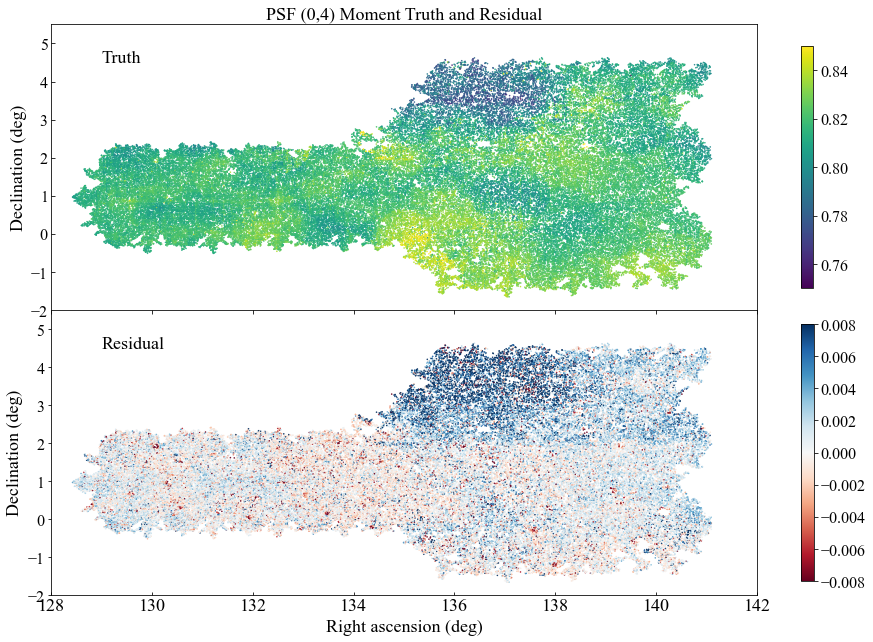

In [106]:
viewmap_compact(2,11,0.75,0.85,0.008,'hsc_example1.png')

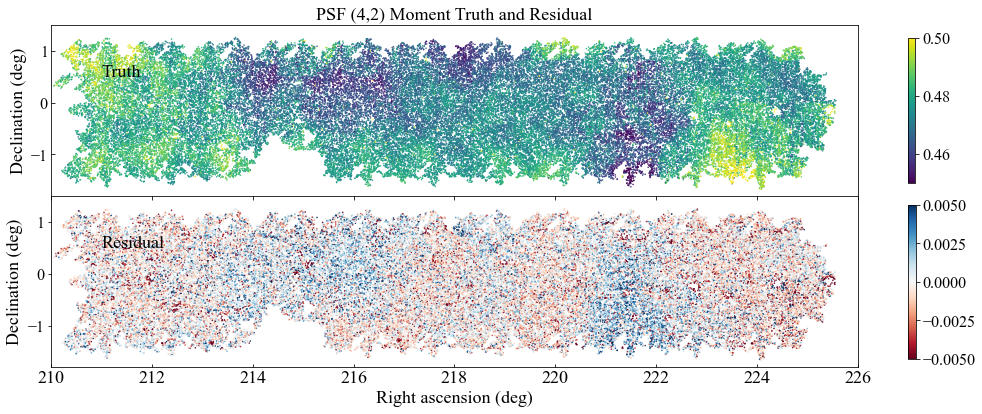

In [107]:
viewmap_compact(0,20,0.45,0.50,0.005,'hsc_example2.png')

In [12]:
with open('pickle/moment_average.pkl','rb') as f:  # Python 3: open(..., 'rb')
    mean_residual_list,label_list,var_data,twentyfive, seventyfive  = pickle.load(f)

In [6]:
residual_piff = np.load('../PIFF/data/piff_residual_list.npy')

In [7]:
residual_psfex = np.load('../PIFF/data/psfex_residual_list.npy')

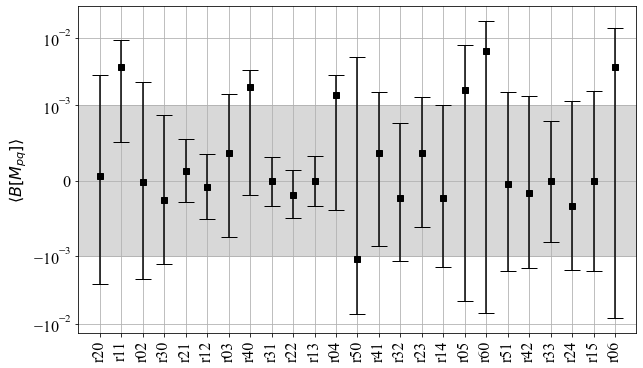

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10, 6)) 

low_bar = mean_residual_list - twentyfive[25:]
high_bar = seventyfive[25:] - mean_residual_list
mappable = ax.errorbar(list(range(25)), mean_residual_list,yerr = [low_bar, high_bar], fmt = 's', markersize=6, capsize=8, color = 'black' )

ax.set_xticks(np.arange(0,25,1))
ax.set_xticklabels(label_list[25:], rotation='vertical', fontsize=16,)
ax.yaxis.label.set_size(16)

plt.xlim([-1,25])
plt.yscale('symlog', linthresh = 0.001)
plt.grid()
plt.ylabel(r"$\langle B[M_{pq}] \rangle$")
ax.fill_between(list(range(-2,27)), -0.001, 0.001, color = 'grey', alpha = 0.3)
#plt.title('Mean Higher Moment Residual')




In [8]:
pqlist = [(2,0),(1,1),(0,2),(3,0),(2,1),(1,2),(0,3),(4,0),(3,1),(2,2),(1,3),(0,4),(5,0),(4,1),(3,2),(2,3),(1,4),(0,5),(6,0),(5,1),(4,2),(3,3),(2,4),(1,5),(0,6)]
pqlist[0:3] = [r'$e_1$', r'$\sigma$', r'$e_2$']

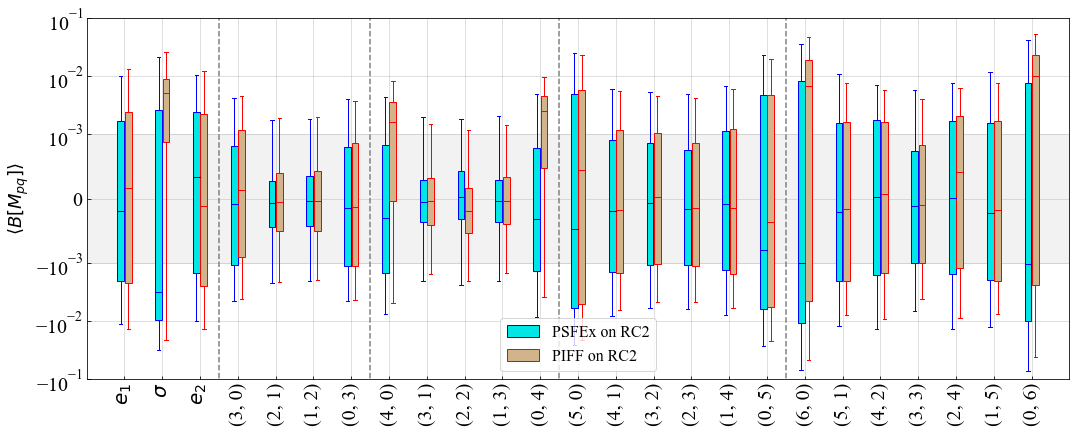

In [9]:
fig, ax = plt.subplots(1,1,figsize=(15, 6)) 
fig.subplots_adjust(left=0.08, bottom=None, right=0.99, top=0.96, wspace=0.0, hspace=0.0)

bp1 = plt.boxplot(residual_psfex.T, showfliers = False, whis =[2.4,97.6] ,positions = np.arange(0.9,25.9,1), widths = 0.18, patch_artist = True )
bp2 = plt.boxplot(residual_piff.T, showfliers = False,whis =[2.4,97.6], positions = np.arange(1.1,26.1,1), widths = 0.18 , patch_artist = True)


for element in ['boxes', 'whiskers',  'medians', 'caps']:
    plt.setp(bp1[element], color='blue')
    plt.setp(bp2[element], color='red')
    
for patch in bp1['boxes']:
    
    
    patch.set(facecolor=[0,0.9,0.9],alpha = 1.0)  
for patch in bp2['boxes']:
    
    #print(patch.filled_markers)
    patch.set(facecolor='tan')  
    
#print(dir(patch))

ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['PSFEx on RC2', 'PIFF on RC2'])
    
#     boxs_piff['boxes'][i].set_color('red')
#     boxs_piff['medians'][i].set_color('red')
#     boxs_piff['whiskers'][i].set_color('red')
#     boxs_piff['caps'][i].set_color('red')

#boxs['boxes'][0].set_color('red')
ax.set_xticks( np.arange(1,26,1) )
ax.set_xticklabels( pqlist, rotation='vertical', fontsize=18)

#plt.yticks( fontsize=18)

plt.xticks(fontsize = 20)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labelsize = 20)
#plt.yticks(fontsize = 25)
ax.tick_params(
    axis='y',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=True,
    labelsize = 20)


ax.yaxis.label.set_size(18)
#ax.xaxis.label.set_size(18)

plt.xlim([0,26])
plt.yscale('symlog', linthresh = 0.001)
plt.grid(alpha = 0.5)
plt.ylabel(r"$\langle B[M_{pq}] \rangle$")
ax.fill_between(list(range(-2,27)), -0.001, 0.001, color = 'grey', alpha = 0.1)

plt.ylim([-0.1,0.1])

plt.plot([3.5,3.5], [-1,1], '--',color = 'grey')
plt.plot([7.5,7.5], [-1,1], '--',color = 'grey')
plt.plot([12.5,12.5], [-1,1], '--',color = 'grey')
plt.plot([18.5,18.5], [-1,1], '--',color = 'grey')


#plt.show()

#plt.savefig('mean_residual.pdf', dpi = 300)


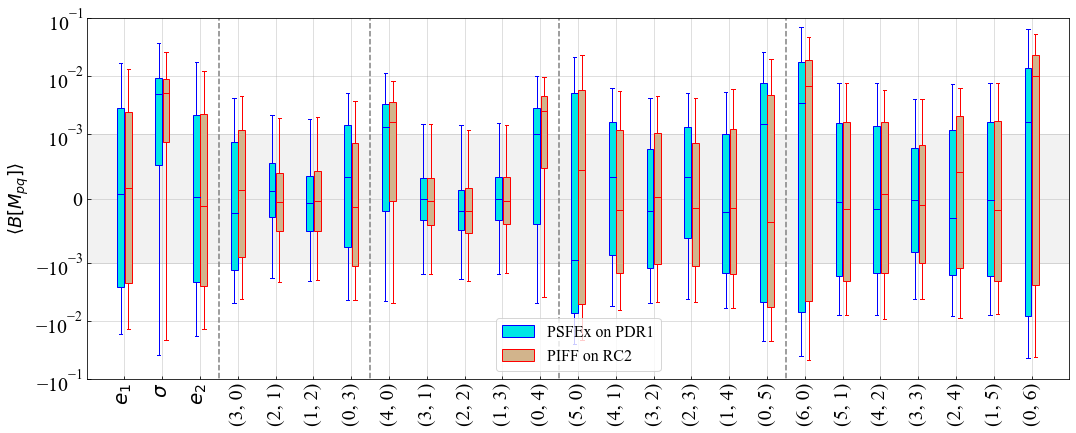

In [10]:
fig, ax = plt.subplots(1,1,figsize=(15, 6)) 
fig.subplots_adjust(left=0.08, bottom=None, right=0.99, top=0.96, wspace=0.0, hspace=0.0)

bp1 = plt.boxplot(residual_list.T, showfliers = False, whis =[2.4,97.6] ,positions = np.arange(0.9,25.9,1), widths = 0.18, patch_artist = True )
bp2 = plt.boxplot(residual_piff.T, showfliers = False,whis =[2.4,97.6], positions = np.arange(1.1,26.1,1), widths = 0.18 , patch_artist = True)


for element in ['boxes', 'whiskers',  'medians', 'caps']:
    plt.setp(bp1[element], color='blue')
    plt.setp(bp2[element], color='red')
    
for patch in bp1['boxes']:
    
    
    patch.set(facecolor=[0,0.9,0.9],alpha = 1.0)  
for patch in bp2['boxes']:
    
    #print(patch.filled_markers)
    patch.set(facecolor='tan')  
    
#print(dir(patch))

ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['PSFEx on PDR1', 'PIFF on RC2'])
    
#     boxs_piff['boxes'][i].set_color('red')
#     boxs_piff['medians'][i].set_color('red')
#     boxs_piff['whiskers'][i].set_color('red')
#     boxs_piff['caps'][i].set_color('red')

#boxs['boxes'][0].set_color('red')
ax.set_xticks( np.arange(1,26,1) )
ax.set_xticklabels( pqlist, rotation='vertical', fontsize=18)

#plt.yticks( fontsize=18)

plt.xticks(fontsize = 20)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labelsize = 20)
#plt.yticks(fontsize = 25)
ax.tick_params(
    axis='y',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=True,
    labelsize = 20)


ax.yaxis.label.set_size(18)
#ax.xaxis.label.set_size(18)

plt.xlim([0,26])
plt.yscale('symlog', linthresh = 0.001)
plt.grid(alpha = 0.5)
plt.ylabel(r"$\langle B[M_{pq}] \rangle$")
ax.fill_between(list(range(-2,27)), -0.001, 0.001, color = 'grey', alpha = 0.1)

plt.ylim([-0.1,0.1])

plt.plot([3.5,3.5], [-1,1], '--',color = 'grey')
plt.plot([7.5,7.5], [-1,1], '--',color = 'grey')
plt.plot([12.5,12.5], [-1,1], '--',color = 'grey')
plt.plot([18.5,18.5], [-1,1], '--',color = 'grey')


#plt.show()

plt.savefig('mean_residual.pdf', dpi = 300)


In [11]:
residual_piff.shape

(25, 16528)

In [12]:
piff_cov = np.cov(residual_piff)
piff_corr = np.zeros((25,25))
for i in range(25):
    for j in range(25):
        piff_corr[i][j] = piff_cov[i][j] / np.sqrt(piff_cov[i][i]*piff_cov[j][j])

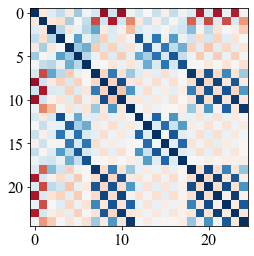

In [13]:
plt.imshow(piff_corr, cmap = 'RdBu', vmin = -1.0, vmax = 1.0)

In [599]:
with open('pickle/full_correlation.pkl','rb') as f:  # Python 3: open(..., 'rb')
    correlation_matrix, label_list  = pickle.load(f)

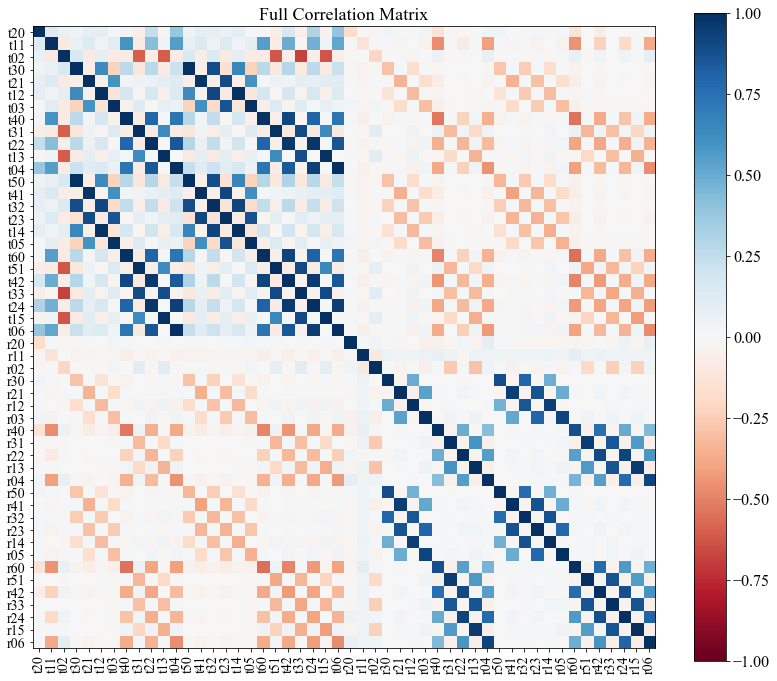

In [600]:


fig, ax = plt.subplots(1,1,figsize=(12, 12)) 
mappable = ax.imshow(correlation_matrix, cmap = 'RdBu',vmin = -1.0, vmax = 1.0)

plt.gcf().subplots_adjust(bottom=0.0, left = 0.1, right = 1, top = 1 )


plt.title('Full Correlation Matrix', fontsize = 18)
# Set number of ticks for x-axis
# Set ticks labels for x-axis
ax.set_xticks(np.arange(0,50,1))
ax.set_yticks(np.arange(0,50,1))

ax.set_xticklabels(label_list, rotation='vertical', fontsize=14)
ax.set_yticklabels(label_list, rotation='horizontal', fontsize=14)

plt.colorbar(mappable, ax = ax, shrink = 0.75)

plt.savefig('full_correlation.pdf', dpi = 300)



In [601]:
correlation_matrix

array([[ 1.        ,  0.13161799,  0.06954097, ..., -0.00287407,
         0.00544873,  0.0177865 ],
       [ 0.13161799,  1.        , -0.09488088, ..., -0.19808294,
         0.02067439, -0.38106361],
       [ 0.06954097, -0.09488088,  1.        , ...,  0.03791095,
         0.02008976,  0.08634985],
       ...,
       [-0.00287407, -0.19808294,  0.03791095, ...,  1.        ,
        -0.04476227,  0.79946279],
       [ 0.00544873,  0.02067439,  0.02008976, ..., -0.04476227,
         1.        , -0.06378526],
       [ 0.0177865 , -0.38106361,  0.08634985, ...,  0.79946279,
        -0.06378526,  1.        ]])

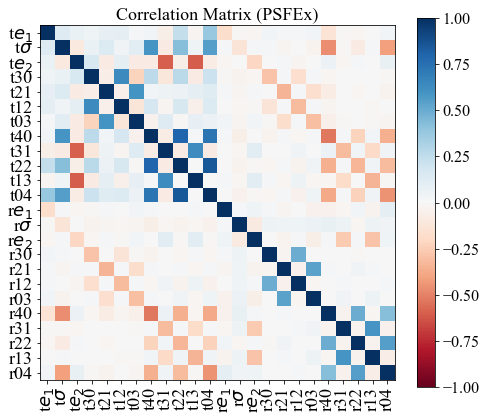

In [602]:

small_matrix = np.concatenate([correlation_matrix[0:12, :], correlation_matrix[25:37, :]])
small_matrix = np.column_stack([small_matrix[:, 0:12], small_matrix[:, 25:37]])

small_label_list = label_list[0:12]+label_list[25:37]


small_label_list[0:3] = [r't$e_1$', r't$\sigma$', r't$e_2$']
small_label_list[12:15] = [r'r$e_1$', r'r$\sigma$', r'r$e_2$']


fig, ax = plt.subplots(1,1,figsize=(7, 6)) 

mappable = ax.imshow(small_matrix, cmap = 'RdBu',vmin = -1.0, vmax = 1.0)

plt.gcf().subplots_adjust(bottom=0.05, left = 0.1, right = 0.98, top = 1.0 )


plt.title('Correlation Matrix (PSFEx)', fontsize = 18)
# Set number of ticks for x-axis
# Set ticks labels for x-axis
ax.set_xticks(np.arange(0,24,1))
ax.set_yticks(np.arange(0,24,1))

ax.set_xticklabels(small_label_list, rotation='vertical', fontsize=18)
ax.set_yticklabels(small_label_list, rotation='horizontal', fontsize=18)

plt.colorbar(mappable, ax = ax, shrink = 0.9)

plt.savefig('full_correlation_psfex.pdf', dpi = 300)



In [18]:
with open('pickle/full_correlation_piff.pkl','rb') as f:  # Python 3: open(..., 'rb')
    correlation_matrix, label_list  = pickle.load(f)

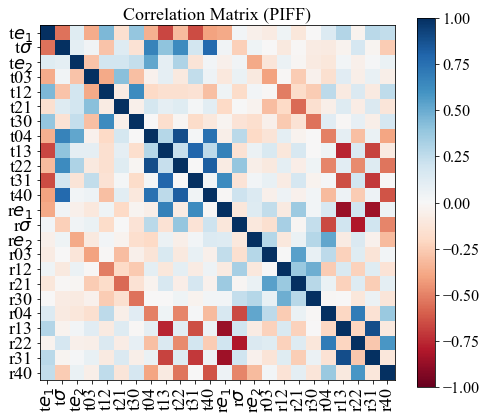

In [19]:

small_matrix = np.concatenate([correlation_matrix[0:12, :], correlation_matrix[25:37, :]])
small_matrix = np.column_stack([small_matrix[:, 0:12], small_matrix[:, 25:37]])

small_label_list = label_list[0:12]+label_list[25:37]

small_label_list[0:3] = [r't$e_1$', r't$\sigma$', r't$e_2$']
small_label_list[12:15] = [r'r$e_1$', r'r$\sigma$', r'r$e_2$']


fig, ax = plt.subplots(1,1,figsize=(7, 6)) 

mappable = ax.imshow(small_matrix, cmap = 'RdBu',vmin = -1.0, vmax = 1.0)

plt.gcf().subplots_adjust(bottom=0.05, left = 0.1, right = 0.98, top = 1.0 )


plt.title('Correlation Matrix (PIFF)', fontsize = 18)
# Set number of ticks for x-axis
# Set ticks labels for x-axis
ax.set_xticks(np.arange(0,24,1))
ax.set_yticks(np.arange(0,24,1))

ax.set_xticklabels(small_label_list, rotation='vertical', fontsize=18)
ax.set_yticklabels(small_label_list, rotation='horizontal', fontsize=18)

plt.colorbar(mappable, ax = ax, shrink = 0.9)

plt.savefig('full_correlation_piff.pdf', dpi = 300)



In [473]:
small_label_list

['t[$e_1$]',
 't[$\\sigma$]',
 't[$e_2$]',
 't20',
 't03',
 't12',
 't21',
 't30',
 't04',
 't13',
 't22',
 't31',
 't40',
 'r02',
 'r[$e_1$]',
 'r[$\\sigma$]',
 'r[$e_2$]',
 'r03',
 'r12',
 'r21',
 'r30',
 'r04',
 'r13',
 'r22',
 'r31',
 'r40']

In [20]:
with open('pickle/mul_prelim.pkl','rb') as f:  # Python 3: open(..., 'rb')
    g1_m,g2_m,label_list = pickle.load(f)

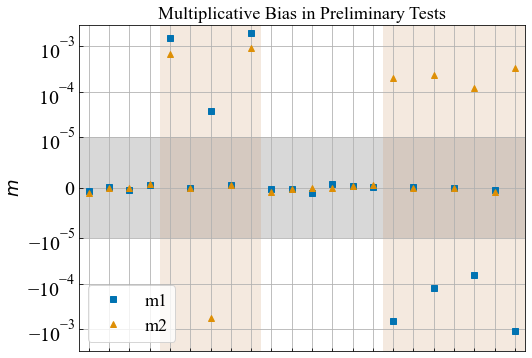

In [62]:

fig, ax = plt.subplots(1,1,figsize=(8, 6)) 
ax.plot(np.arange(3,25),g1_m,'s',label = 'm1', color = cmap[0])
ax.plot(np.arange(3,25),g2_m,'^',label = 'm2', color = cmap[1])

ax.axvspan(6.5, 11.5, color=cmap[5], alpha=0.2, lw=0)

ax.axvspan(17.5, 24.5, color=cmap[5], alpha=0.2, lw=0)


ax.set_xticks(np.arange(3,25,1))
ax.set_xticklabels(label_list[28:], rotation='vertical', fontsize=18)

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labelsize = 20)
#plt.yticks(fontsize = 25)
ax.tick_params(
    axis='y',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=True,
    labelsize = 20)

plt.grid()
plt.legend(fontsize = 18)
plt.ylabel(r'$m$', fontsize = 18)
plt.title("Multiplicative Bias in Preliminary Tests", fontsize = 18)

plt.yscale('symlog', linthresh = 0.00001)
plt.ylim([-0.003, 0.003])
plt.xlim([2.5,24.5])
ax.fill_between(list(range(-2,27)), -0.00001, 0.00001, color = 'grey', alpha = 0.3, lw=0)



plt.savefig('multiplicative_preliminary.pdf', dpi = 300)

In [84]:
with open('pickle/additive_prelim.pkl','rb') as f:  # Python 3: open(..., 'rb')
    r, c1_total,c1_sig_total, c2_total, c2_sig_total, xi_cov_total = pickle.load(f)
    
with open('pickle/true_xi.pkl', 'rb') as f:
    theta,xip_raw, xim_raw = pickle.load(f)

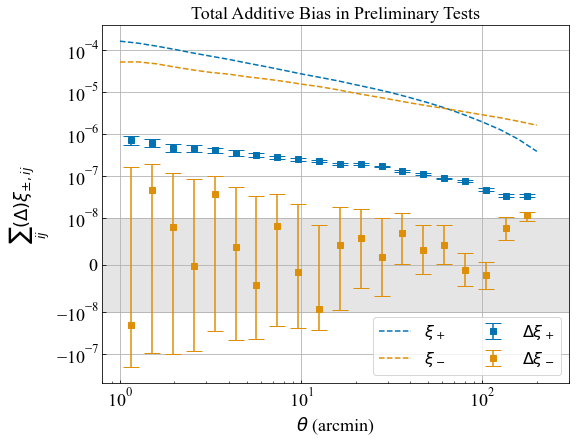

In [90]:

fig, ax = plt.subplots(1,1,figsize = (8,6))
fig.subplots_adjust(left=0.18, bottom=0.12, right=0.99, top=0.95, wspace=0.0, hspace=0.0)


plt.plot(theta, xip_raw,'--', color = cmap[0], label = r'$ \xi_+$')
plt.plot(theta, xim_raw,'--', color = cmap[1], label = r'$ \xi_-$')

plt.errorbar(r,c1_total,c1_sig_total,label = r'$ \Delta \xi_+$', color = cmap[0],fmt = 's', markersize=6, capsize=8,)
plt.errorbar(r,c2_total,c2_sig_total,label = r'$ \Delta \xi_-$', color = cmap[1],fmt = 's', markersize=6, capsize=8,)
plt.yscale('symlog', linthresh = 1e-8)
ax.fill_between(list(range(0,300)), -1e-8, 1e-8, color = 'grey', alpha = 0.2)

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    labelsize = 18)

ax.tick_params(
    axis='y',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    labelsize = 18)


plt.xscale('log')
plt.ylabel(r'$\sum_{ij} (\Delta) \xi_{\pm, ij}$', fontsize = 18)
plt.xlabel(r'$\theta$ (arcmin)', fontsize = 18)
plt.title("Total Additive Bias in Preliminary Tests", fontsize = 18)
plt.xlim([0.8,300])
#plt.ylim([-0.8e-8,3e-7])
plt.grid()
plt.legend(frameon =True ,ncol=2)
plt.savefig('total_additive.pdf', dpi = 300)

In [4]:
with open('../plots2/pickle/moment_ranking.pkl','rb') as f:
    forward_info_perc, info_perc_integral, label_list = pickle.load(f)
    

label_list = ['All']+label_list
info_perc_integral = np.concatenate([info_perc_integral,np.array([0])])

In [5]:
print(label_list)
print(forward_info_perc.shape)
print(1-info_perc_integral)

['All', '(3, 1)', '(5, 1)', '(3, 3)', '(1, 3)', '(1, 5)', '(4, 0)', '(0, 4)', '(6, 0)', '(0, 6)', '(4, 2)', '(2, 4)', '(5, 0)', '(0, 5)', '(1, 2)', '(2, 1)', '(4, 1)', '(1, 4)', '(3, 0)', '(0, 3)', '(3, 2)', '(2, 3)', '(2, 2)']
(23,)
[0.         0.04361907 0.16734386 0.36086369 0.60318255 0.90035763
 0.91820785 0.93981603 0.96484754 0.98967437 0.99425648 0.99834417
 0.99884791 0.99931559 0.99942695 0.99953447 0.99963794 0.99973676
 0.99983549 0.99990598 0.99995492 0.99999749 1.        ]


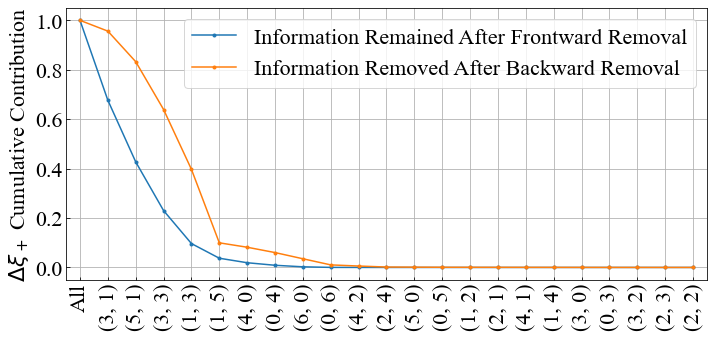

In [16]:

fig, ax = plt.subplots(1,1,figsize=(10, 5)) 

fig.subplots_adjust(left=0.10, bottom=None, right=0.99, top=None, wspace=0.0, hspace=0.0)

mappable = plt.plot(np.arange(0,23,1), forward_info_perc, '.-' , label = "Information Remained After Frontward Removal")
mappable = plt.plot(np.arange(0,23,1), info_perc_integral, '.-' , label = "Information Removed After Backward Removal")


ax.set_xticks(np.arange(0,23,1))
ax.set_xticklabels(label_list, rotation='vertical', fontsize=14)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    labelsize = 22)

ax.tick_params(
    axis='y',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    labelsize = 22)

plt.grid()
plt.legend(fontsize = 22)
#plt.yscale('symlog',linthresh = 0.01 )
plt.xlim([-0.5,22.5])
#plt.xlim([])

plt.ylabel(r'$\Delta \xi_+$ Cumulative Contribution', fontsize = 22)

plt.savefig('moment_ranking.pdf', dpi = 300)




In [10]:
with open('../plots2/pickle/moment_ranking1.pkl','rb') as f:
    forward_info_perc1, info_perc_integral1, label_list1 = pickle.load(f)
    
with open('../plots2/pickle/moment_ranking2.pkl','rb') as f:
    forward_info_perc2, info_perc_integral2, label_list2 = pickle.load(f)
    
label_list1 = ['All']+label_list1
label_list2 = ['All']+label_list2
info_perc_integral1 = np.concatenate([info_perc_integral1,np.array([0])])
info_perc_integral2 = np.concatenate([info_perc_integral2,np.array([0])])

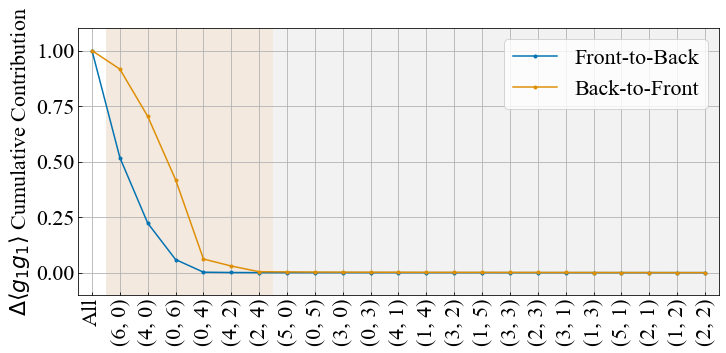

In [20]:

fig, ax = plt.subplots(1,1,figsize=(10, 5)) 
fig.subplots_adjust(left=0.10, bottom=0.14, right=0.99, top=None, wspace=0.0, hspace=0.0)


mappable = plt.plot(np.arange(0,23,1), forward_info_perc1, '.-' , label = "Front-to-Back", color = cmap[0])
mappable = plt.plot(np.arange(0,23,1), info_perc_integral1, '.-' , label = "Back-to-Front", color = cmap[1])

#ax.fill_between(list(range(0,24)), 0, 0.01, color = 'grey', alpha = 0.3)
ax.fill_between(np.arange(6.5,24,0.1), -1, 2, color = 'grey', alpha = 0.1, lw=0)
ax.fill_between(np.arange(0.5,6.6,0.1), -1, 2, color = cmap[5], alpha = 0.2, lw=0)


ax.set_xticks(np.arange(0,23,1))
ax.set_xticklabels(label_list1, rotation='vertical', fontsize=22)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    labelsize = 22)

ax.tick_params(
    axis='y',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    labelsize = 22)
plt.grid()
plt.legend(fontsize = 22)
# plt.yscale('symlog',linthresh = 0.01 )
plt.ylim([-0.1,1.1])
plt.xlim([-0.5,22.5])
# plt.xlim([])

plt.ylabel(r'$\Delta \langle g_1 g_1 \rangle$ Cumulative Contribution', fontsize = 22)

plt.savefig('moment_ranking_c1.pdf', dpi = 300)




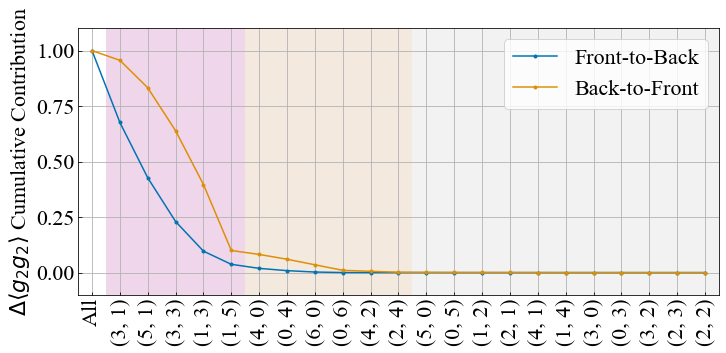

In [21]:

fig, ax = plt.subplots(1,1,figsize=(10, 5)) 

fig.subplots_adjust(left=0.10, bottom=0.14, right=0.99, top=None, wspace=0.0, hspace=0.0)

mappable = plt.plot(np.arange(0,23,1), forward_info_perc2, '.-' , label = "Front-to-Back", color = cmap[0])
mappable = plt.plot(np.arange(0,23,1), info_perc_integral2, '.-' , label = "Back-to-Front", color = cmap[1])

#ax.fill_between(list(range(0,24)), 0, 0.01, color = 'grey', alpha = 0.3)
ax.fill_between(np.arange(11.5,24,0.1), -1, 2, color = 'grey', alpha = 0.1, lw=0)
ax.fill_between(np.arange(5.5,11.6,0.1), -1, 2, color = cmap[5], alpha = 0.2, lw=0)
ax.fill_between(np.arange(0.5,5.6,0.1), -1, 2, color = cmap[4], alpha = 0.3, lw=0)

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    labelsize = 22)

ax.tick_params(
    axis='y',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    labelsize = 22)

ax.set_xticks(np.arange(0,23,1))
ax.set_xticklabels(label_list2, rotation='vertical', fontsize=22)

plt.grid()
plt.legend(fontsize = 22)
#plt.yscale('symlog',linthresh = 0.01 )
plt.ylim([-0.1,1.1])
plt.xlim([-0.5,22.5])
#plt.xlim([])

plt.ylabel(r'$\Delta \langle g_2 g_2 \rangle$ Cumulative Contribution', fontsize = 22)

plt.savefig('moment_ranking_c2.pdf', dpi = 300)




In [67]:
with open('../plots2/pickle/two_groups.pkl','rb') as f:
    r, c1_total, c2_total, c1_cov_total, c2_cov_total, c2group2total ,c1group1total = pickle.load(f)

In [78]:
c1_cov_total.shape

(20, 20)

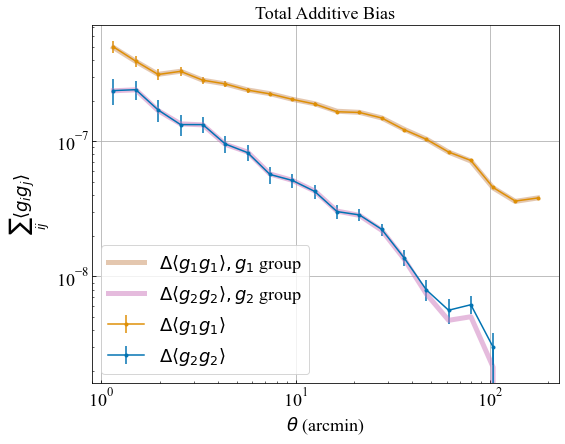

In [79]:



fig, ax = plt.subplots(1,1,figsize = (8,6))
fig.subplots_adjust(left=0.18, bottom=0.12, right=0.99, top=0.95, wspace=0.0, hspace=0.0)

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    labelsize = 18)

ax.tick_params(
    axis='y',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    labelsize = 18)

plt.errorbar(r,c1_total,np.sqrt(np.diag(c1_cov_total)),fmt = '.-',label = r'$\Delta \langle g_1 g_1 \rangle $', color = cmap[1])
plt.errorbar(r,c2_total,np.sqrt(np.diag(c1_cov_total)),fmt = '.-',label = r'$\Delta \langle g_2 g_2 \rangle $', color = cmap[0])

#plt.plot(r,c1group2total, label = r'$\Delta \langle g_1 g_1 \rangle $, group2')

plt.plot(r,c1group1total, label = r'$\Delta \langle g_1 g_1 \rangle , g_1$ group', color = cmap[5], linewidth = 5, alpha = 0.5)
plt.plot(r,c2group2total, label = r'$\Delta \langle g_2 g_2 \rangle , g_2$ group', color = cmap[4], linewidth = 5, alpha = 0.5)

#plt.plot(r,c2group1total, label = r'$\Delta \langle g_2 g_2 \rangle $, group1')



plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\sum_{ij} \langle g_i g_j \rangle $', fontsize = 18)
plt.xlabel(r'$\theta$ (arcmin)', fontsize = 18)
plt.title("Total Additive Bias", fontsize = 18)
plt.grid()
plt.legend(fontsize = 18)

plt.savefig('two_groups.pdf', dpi = 300)


In [108]:
with open('../plots2/pickle/group1_maps.pkl','rb') as f:
    r_fluc_reduced,xi_fluc_reduced,xi_fluc_sig_reduced, theta_list, back_xi1,back_xi2, r_map, xi_maps1,xi_maps2, reduce_pq  = pickle.load(f)
    
r_fluc_reduced = r_fluc_reduced[0:18]
xi_fluc_reduced = xi_fluc_reduced[:,:,0:18]
xi_fluc_sig_reduced = xi_fluc_sig_reduced[:,:,0:18]
    


In [109]:
print(xi_fluc_sig_reduced.shape)

(11, 11, 18)


In [115]:
y_range_group1 = {}
nob = 6
for i in range(nob):
    for j in range(i,nob):    
        
        p,q = reduce_pq[i], reduce_pq[j]
    
        if j not in y_range_group1.keys():
            y_range_group1[j] = [0,0]
        #print min(min(np.array([t["abs_bias"][0] for t in test13result[j]])/0.005),y_range[n][0])
        y_range_group1[j][0] = min(min(xi_fluc_reduced[i][j] ),y_range_group1[j][0])
        #y_range_group1[j][0] = min(min(back_xi1[i][j]),y_range_group1[j][0])
        #y_range_group1[p][0] = min(min(xi_maps1[i][j]),y_range_group1[p][0])

        y_range_group1[j][1] = max(max(xi_fluc_reduced[i][j]),y_range_group1[j][1])
        y_range_group1[j][1] = max(max(back_xi1[i][j]),y_range_group1[j][1])
        #y_range_group1[p][1] = max(max(xi_maps1[i][j]),y_range_group1[p][1])


In [117]:
print(y_range_group1)

{0: [-1.3118731887135847e-07, 5.308734780696128e-06], 1: [-8.607203661735895e-08, 4.050039781755043e-06], 2: [-1.7361597665002726e-05, 0.00030376654506170423], 3: [-9.136131396136776e-07, 2.6602764079072674e-05], 4: [-5.750568217558009e-07, 2.2117658937572602e-05], 5: [-1.3023974546520426e-05, 0.0002358220806008854]}


/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_29479/441659527.py:75: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_range_group1[j])
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_29479/441659527.py:75: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_range_group1[j])
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_29479/441659527.py:75: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_range_group1[j])
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_29479/441659527.py:75: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_range_group1[j])
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_29479/441659527.py:75: UserWarning: Attempted to set non-posi

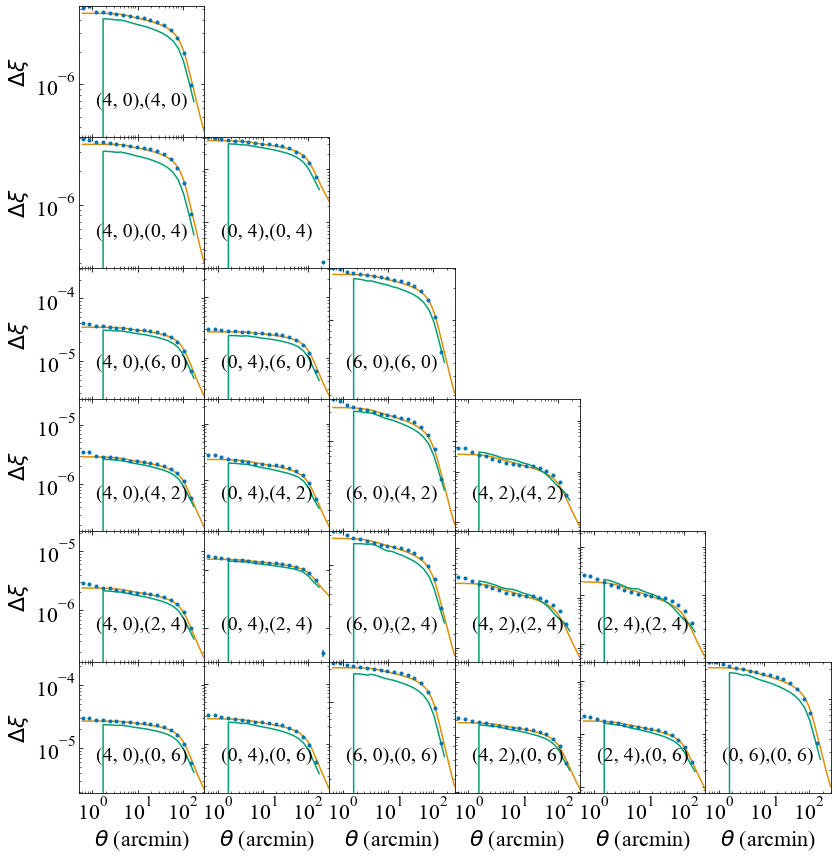

In [133]:


fig = plt.figure(figsize = (12,12))
fig.subplots_adjust(left=0.09, bottom=0.07, right=0.96, top=0.98, wspace=0.0, hspace=0.0)

# f, axes = plt.subplots(4, 7, sharex='col', sharey='row', figsize=(21,12))
# f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.0)



nob = 6
for i in range(nob):
    for j in range(i,nob):
        
        p,q = reduce_pq[i], reduce_pq[j]

        #print(i,j,p,q)
        
        ax = plt.subplot(nob,nob,i+6*j+1) 
        #print n
        #ax = plt.subplot(4,7,1+7*(n-3)+p)


        plt.errorbar(r_fluc_reduced,xi_fluc_reduced[i][j],xi_fluc_sig_reduced[i][j], fmt = '.', color = cmap[0])
        plt.plot(theta_list*60.0, back_xi1[i][j], color = cmap[1])
        plt.plot(r_map, xi_maps1[i][j], color = cmap[2])



        ax.tick_params(
            axis='x',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=True,         # ticks along the top edge are off
            labelbottom=False)

        ax.tick_params(
            axis='y',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            left=True,      # ticks along the bottom edge are off
            right=True,         # ticks along the top edge are off
            labelleft=False)

        #ax.tick_params(axis="y",direction="in")



        if j==5:
            plt.xlabel(r"$\theta$ (arcmin)",fontsize = 22)
            ax.tick_params(
                axis='x',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                bottom=True,      # ticks along the bottom edge are off
                top=True,         # ticks along the top edge are off
                labelbottom=True,
                labelsize = 22)
           
        if i==0:
        
            plt.ylabel(r'$\Delta \xi$',fontsize = 22)
            #plt.ticklabel_format(axis='y',style='scientific',scilimits=(0,3))
            ax.tick_params(
                axis='y',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                left=True,      # ticks along the bottom edge are off
                right=True,         # ticks along the top edge are off
                labelleft=True,
                labelsize = 22)

            
        plt.xscale('log')
        plt.yscale('log')
        plt.ylim(y_range_group1[j])
        plt.xlim([0.5,300])


        plt.title(str(p)+","+str(q),y = 0.2, fontsize = 20)
        #plt.grid()
        #plt.legend([])


plt.subplot(4,7,7,frame_on = False)
plt.plot([],[],'.',color = cmap[0],label = r'HSC Measurement $\Delta \xi_{hsc}$')
plt.plot([0],[0],color = cmap[1],label = r'$\Delta \xi(C_\ell( \Delta \xi_{hsc}))$')
plt.plot([0],[0],color = cmap[2],label = r'$\Delta \xi_{GRF}$')
plt.axis('off')
#plt.legend(fontsize = 22,frameon = False)


plt.savefig('group1_map.pdf',dpi = 300)

    #fig.colorbar(axes)

In [125]:
y_range_group2 = {}
nob = 5
for i in range(nob):
    for j in range(i,nob):    
        
        p,q = reduce_pq[i+6], reduce_pq[j+6]
    
        if j not in y_range_group2.keys():
            y_range_group2[j] = [0,0]
        #print min(min(np.array([t["abs_bias"][0] for t in test13result[j]])/0.005),y_range[n][0])
        y_range_group2[j][0] = min(min(xi_fluc_reduced[i+6][j+6] ),y_range_group2[j][0])
        y_range_group2[j][0] = min(min(back_xi2[i][j]),y_range_group2[j][0])
        #y_range_group1[p][0] = min(min(xi_maps1[i][j]),y_range_group1[p][0])

        y_range_group2[j][1] = max(max(xi_fluc_reduced[i+6][j+6]),y_range_group2[j][1])
        y_range_group2[j][1] = max(max(back_xi2[i][j]),y_range_group2[j][1])
        #y_range_group1[p][1] = max(max(xi_maps1[i][j]),y_range_group1[p][1])


In [126]:
print(y_range_group2)

{0: [-3.9784825466506067e-10, 8.856536997790454e-08], 1: [-6.614327826087917e-10, 8.602069038969404e-08], 2: [-6.749162196848441e-09, 2.261973323283553e-06], 3: [-7.4102301859766404e-09, 1.1434691178996566e-06], 4: [-1.706285167426703e-08, 2.0638052807557297e-06]}


/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_29479/4003720829.py:72: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_range_group2[j])
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_29479/4003720829.py:72: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_range_group2[j])
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_29479/4003720829.py:72: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_range_group2[j])
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_29479/4003720829.py:72: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_range_group2[j])
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_29479/4003720829.py:72: UserWarning: Attempted to set non

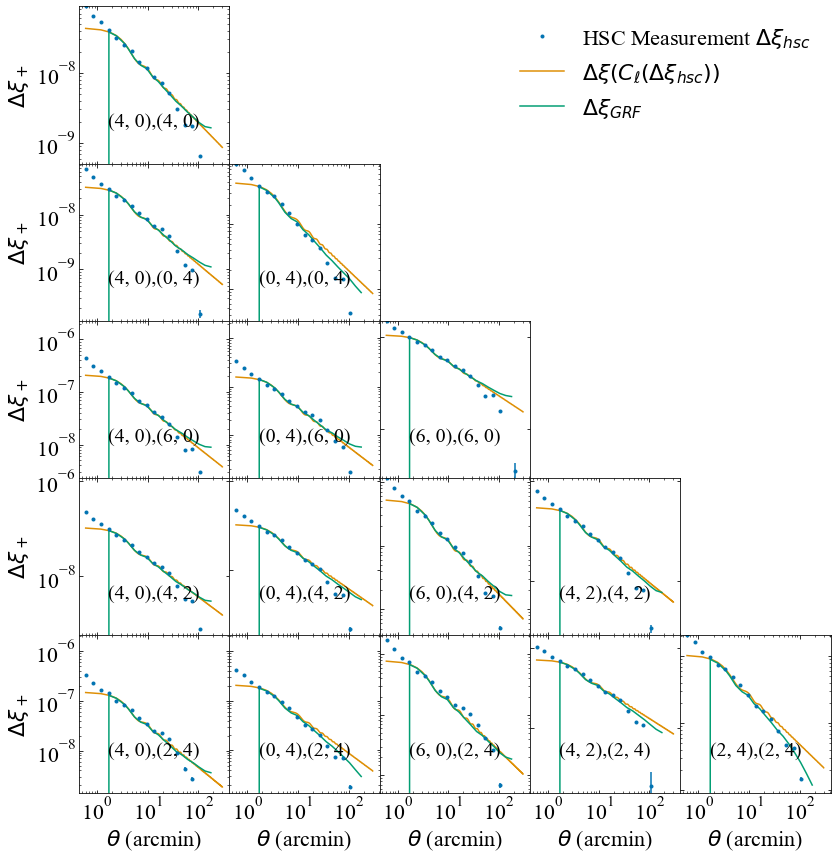

In [132]:


fig = plt.figure(figsize = (12,12))
fig.subplots_adjust(left=0.09, bottom=0.07, right=0.96, top=0.98, wspace=0.0, hspace=0.0)

# f, axes = plt.subplots(4, 7, sharex='col', sharey='row', figsize=(21,12))
# f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.0)



nob = 5
for i in range(nob):
    for j in range(i,nob):
        
        p,q = reduce_pq[i], reduce_pq[j]

        #print(i,j,p,q)
        
        ax = plt.subplot(nob,nob,i+5*j+1) 
        #print n
        #ax = plt.subplot(4,7,1+7*(n-3)+p)


        plt.errorbar(r_fluc_reduced,xi_fluc_reduced[i+6][j+6],xi_fluc_sig_reduced[i+6][j+6], fmt = '.', color = cmap[0])
        plt.plot(theta_list*60.0, back_xi2[i][j], color = cmap[1])
        plt.plot(r_map, xi_maps2[i][j], color = cmap[2])



        ax.tick_params(
            axis='x',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=True,         # ticks along the top edge are off
            labelbottom=False)

        ax.tick_params(
            axis='y',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            left=True,      # ticks along the bottom edge are off
            right=True,         # ticks along the top edge are off
            labelleft=False)

        #ax.tick_params(axis="y",direction="in")



        if j==4:
            plt.xlabel(r"$\theta$ (arcmin)", fontsize = 22)
            ax.tick_params(
                axis='x',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                bottom=True,      # ticks along the bottom edge are off
                top=True,         # ticks along the top edge are off
                labelbottom=True,labelsize = 22)
           
        if i==0:
        
            plt.ylabel(r'$\Delta \xi_+$', fontsize = 22)
            #plt.ticklabel_format(axis='y',style='scientific',scilimits=(0,3))
            ax.tick_params(
                axis='y',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                left=True,      # ticks along the bottom edge are off
                right=True,         # ticks along the top edge are off
                labelleft=True,labelsize = 22)

        plt.yscale('log')
        plt.xscale('log')
        plt.ylim(y_range_group2[j])
        #plt.xlim([0.5,300])

        plt.title(str(p)+","+str(q),y = 0.2, fontsize = 20)
        #plt.grid()
        #plt.legend([])


plt.subplot(5,5,5,frame_on = False)
plt.plot([],[],'.',color = cmap[0],label = r'HSC Measurement $\Delta \xi_{hsc}$')
plt.plot([0],[0],color = cmap[1],label = r'$\Delta \xi(C_\ell(\Delta \xi_{hsc}))$')
plt.plot([0],[0],color = cmap[2],label = r'$\Delta \xi_{GRF}$')
plt.axis('off')
plt.legend(fontsize = 22,frameon = False)


plt.savefig('group2_map.pdf',dpi = 300)

    #fig.colorbar(axes)

array([  0.60524609,   0.85535529,   1.20891665,   1.70837872,
         2.41373641,   3.41038159,   4.81908948,   6.80836866,
         9.61846729,  13.58489029,  19.18598685,  27.09228702,
        38.24669061,  53.96202517,  76.06821054, 107.10930031,
       150.60920625, 212.62259185])

In [546]:
with open('../plots2/pickle/mul_redshift.pkl','rb') as f:
    x_out, m1_out,x_error, m1_error,zfit,mfit = pickle.load(f)

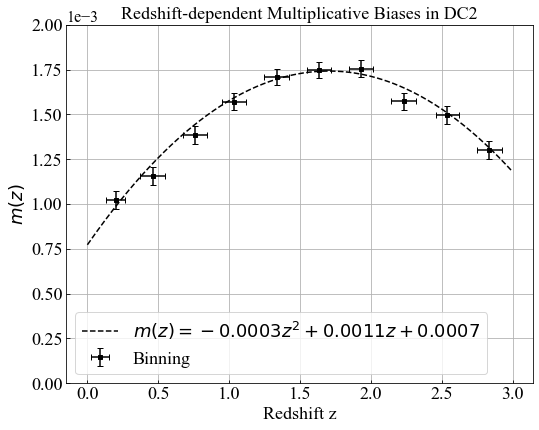

In [551]:
fig, ax = plt.subplots(1,1,figsize = (8,6))
fig.subplots_adjust(left=0.18, bottom=0.12, right=0.99, top=0.95, wspace=0.0, hspace=0.0)

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    labelsize = 18)

ax.tick_params(
    axis='y',          # changes apply to the x-axis
    direction = 'in',
    which='both',      # both major and minor ticks are affected
    labelsize = 18)
plt.errorbar(x_out,m1_out,xerr = x_error, yerr = m1_error,fmt = 's', markersize=4, capsize=3,color = 'black', label = 'Binning')
plt.plot(zfit,mfit,'--',color = 'black', label= r'$m(z) = -0.0003 z^2 + 0.0011 z + 0.0007$')
#plt.errorbar(x_out,m2_out,xerr = x_error, yerr = m2_error)
plt.ylim([0,0.002])
plt.xlabel('Redshift z', fontsize = 18)
plt.ticklabel_format(axis='y',style='scientific',scilimits=(0,3))

plt.ylabel(r'$m(z)$', fontsize = 18)
plt.legend(fontsize = 18)
plt.grid()
plt.title('Redshift-dependent Multiplicative Biases in DC2', fontsize = 18)


plt.savefig('mz_dc2.pdf',dpi = 300)

In [205]:
with open('pickle/raw_results.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    raw_results = pickle.load(f)[0]
with open('pickle/obs_results.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    obs_results = pickle.load(f)[0]

In [206]:
n_tomo = 3
tomo_division = [0.8,1.5]
zmid = [0.50, 1.06, 1.85]

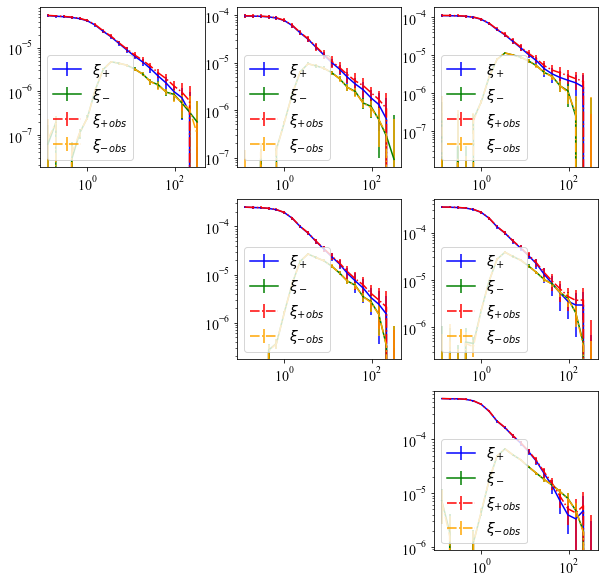

In [207]:
plt.figure(figsize = (10,10))

for i in range(n_tomo):
    for j in range(i,n_tomo):
        #print(i,j)
        plt.subplot(n_tomo,n_tomo,n_tomo*i+j+1)
        
        r = raw_results['r']
        xip_raw = raw_results['xip_raw_'+str(i)+str(j)]
        xim_raw = raw_results['xim_raw_'+str(i)+str(j)]
        
        xip_raw_sig = raw_results['sigxip_raw_'+str(i)+str(j)]
        xim_raw_sig = raw_results['sigxim_raw_'+str(i)+str(j)]
        
        xip_obs = obs_results['xip_obs_'+str(i)+str(j)]
        xim_obs = obs_results['xim_obs_'+str(i)+str(j)]
        
        xip_obs_sig = obs_results['sigxip_obs_'+str(i)+str(j)]
        xim_obs_sig = obs_results['sigxim_obs_'+str(i)+str(j)]
        
        plt.errorbar(r,xip_raw,xip_raw_sig, color = 'blue',label = r'$\xi_+$')
        plt.errorbar(r,xim_raw,xim_raw_sig, color = 'green',label = r'$\xi_-$')

        plt.errorbar(r,xip_obs,xip_obs_sig, fmt= '-.', color = 'red',label = r'$\xi_{+ obs}$')
        plt.errorbar(r,xim_obs,xim_obs_sig, fmt= '-.', color = 'orange',label = r'$\xi_{- obs}$')


        plt.xscale('log')
        plt.yscale('log')
        plt.legend()
        

In [216]:
print(obs_results['xip_obs_00']  )

[ 5.53454619e-05  5.38405144e-05  5.23718905e-05  5.04185927e-05
  4.74453502e-05  4.22041109e-05  3.37379452e-05  2.44664004e-05
  1.83263977e-05  1.29689484e-05  9.36746212e-06  6.80035452e-06
  5.16953422e-06  3.77575697e-06  2.64336563e-06  1.94088511e-06
  1.32245747e-06  9.58663384e-07  6.03764351e-07 -5.31071375e-07]


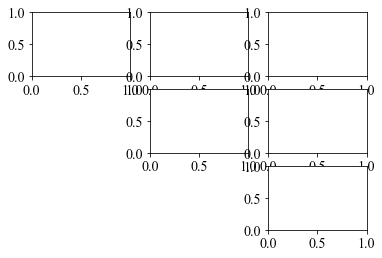

In [208]:
for i in range(n_tomo):
    for j in range(i,n_tomo):
        #print(i,j)
        plt.subplot(n_tomo,n_tomo,n_tomo*i+j+1)
        
        r = raw_results['r']
        xip_raw = raw_results['xip_raw_'+str(i)+str(j)]
        xim_raw = raw_results['xim_raw_'+str(i)+str(j)]
        
        xip_obs = obs_results['xip_obs_'+str(i)+str(j)]
        xim_obs = obs_results['xim_obs_'+str(i)+str(j)]
        
        
        delta_xip = xip_obs - xip_raw
        delta_xim = xim_raw - xim_obs
        
        delta_xip_sig = np.sqrt((raw_results['sigxip_raw_'+str(2)+str(2)] - obs_results['sigxip_obs_'+str(2)+str(2)])**2)
        delta_xim_sig = np.sqrt((raw_results['sigxim_raw_'+str(2)+str(2)] - obs_results['sigxim_obs_'+str(2)+str(2)])**2)



In [210]:
r

array([1.25686456e-01, 1.90767890e-01, 2.89295041e-01, 4.38886000e-01,
       6.64510789e-01, 1.00700950e+00, 1.52532423e+00, 2.31005868e+00,
       3.49768234e+00, 5.29506965e+00, 8.01676656e+00, 1.21353927e+01,
       1.83668332e+01, 2.77925445e+01, 4.20498231e+01, 6.35868888e+01,
       9.60966629e+01, 1.44993571e+02, 2.17646923e+02, 3.23795896e+02])

In [633]:
with open('pickle/diff_results.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    diff_results = pickle.load(f)[0]
    
n_tomo = 3

In [636]:
y_range = {}
nob = 3
for i in range(nob):
    for j in range(i,nob):   
        

        
        delta_xip = diff_results['xip_diff_'+str(i)+str(j)]
        delta_xim = diff_results['xim_diff_'+str(i)+str(j)]
            
        if j not in y_range.keys():
            y_range[j] = [0,0]
#         y_range[j][0] = min(min(delta_xip)*1.1,y_range[j][0])
#         y_range[j][0] = min(min(delta_xim)*1.1,y_range[j][0])
        y_range[j][0] = -1e-7
        y_range[j][1] = 1e-6

        y_range[j][1] = max(max(delta_xip)*1.1,y_range[j][1])
        #y_range[j][1] = max(max(delta_xim)*1.1,y_range[j][1])

        #print(i,j,y_range[j],max(delta_xip),max(delta_xim) )



0 0 1
0 1 4
0 2 7
1 1 5
1 2 8
2 2 9


/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_16140/233388302.py:17: RuntimeWarning: overflow encountered in exp
  return amp1*np.exp(-scale1*x)+amp2*np.exp(-scale2*x)
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_16140/233388302.py:17: RuntimeWarning: overflow encountered in exp
  return amp1*np.exp(-scale1*x)+amp2*np.exp(-scale2*x)
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_16140/233388302.py:17: RuntimeWarning: overflow encountered in exp
  return amp1*np.exp(-scale1*x)+amp2*np.exp(-scale2*x)
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_16140/233388302.py:17: RuntimeWarning: overflow encountered in exp
  return amp1*np.exp(-scale1*x)+amp2*np.exp(-scale2*x)
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_16140/233388302.py:17: RuntimeWarning: overflow encountered in exp
  return amp1*np.exp(-scale1*x)+amp2*np.exp(-scale2*x)
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_16140/233388302.py:17: RuntimeWarnin

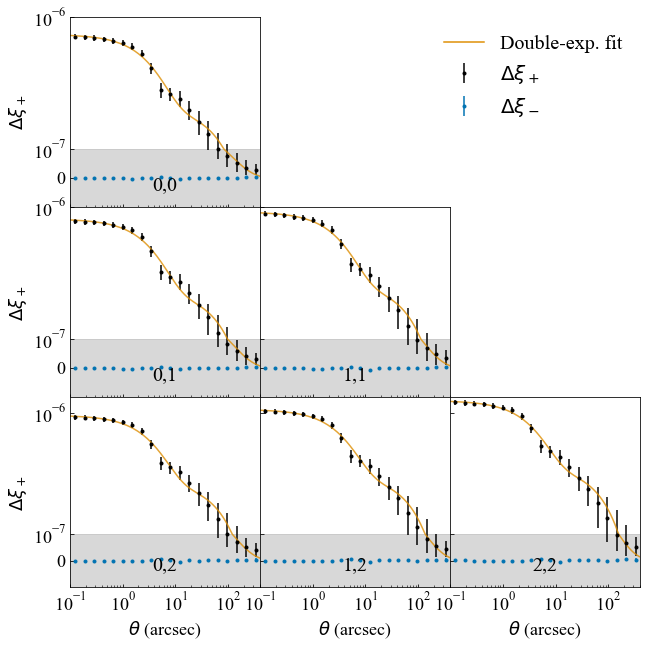

In [637]:
fig = plt.figure(figsize = (9,9))

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.98, top=0.98, wspace=0.0, hspace=0.0)

for i in range(n_tomo):
    for j in range(i,n_tomo):
        print(i,j,i+n_tomo*j+1)
        ax = plt.subplot(n_tomo,n_tomo,i+n_tomo*j+1)
        
        r = diff_results['r']
        
        delta_xip = diff_results['xip_diff_'+str(i)+str(j)]
        delta_xim = diff_results['xim_diff_'+str(i)+str(j)]
        cov_xip = diff_results['cov_diff_'+str(i)+str(j)][:20,:20] 
        cov_xim = diff_results['cov_diff_'+str(i)+str(j)][20:,20:] 
        
        errorbar_xip = np.sqrt(np.diag(cov_xip))
        errorbar_xim = np.sqrt(np.diag(cov_xim))
        
        x_fit = np.arange(0.1,400,0.1)
        popt4, _ =  curve_fit(twoexp, r, delta_xip, sigma = errorbar_xip)
        y_fit4 = twoexp(x_fit, *popt4)
        plt.plot(x_fit,y_fit4, label = r'power law', color = cmap[1], alpha = 0.8)

        


        plt.xlim([0.1,400])

        
        plt.errorbar(r,delta_xip, errorbar_xip, fmt = '.', color = 'black', label = r'$\Delta \xi_+$')
        plt.errorbar(r,delta_xim, errorbar_xim, fmt = '.', color = cmap[0],label = r'$\Delta \xi_-$')
        
        
        ax.tick_params(
            axis='x',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)

        ax.tick_params(
            axis='y',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            left=True,      # ticks along the bottom edge are off
            right=False,         # ticks along the top edge are off
            labelleft=False)

        #ax.tick_params(axis="y",direction="in")



        if j==2:
            plt.xlabel(r"$\theta$ (arcsec)", fontsize = 18)
            ax.tick_params(
                axis='x',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                bottom=True,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=True,
                labelsize = 18)
           
        if i==0:
        
            plt.ylabel(r'$\Delta \xi_+$', fontsize = 18)
            #plt.ticklabel_format(axis='y',style='scientific',scilimits=(0,3))
            ax.tick_params(
                axis='y',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                left=True,      # ticks along the bottom edge are off
                right=False,         # ticks along the top edge are off
                labelleft=True,
                labelsize = 18)

        plt.ylim(y_range[j])

#         plt.xlabel(r'$\theta$ (arcmin)')
#         plt.ylabel(r'$\Delta \xi_{\pm}$')

        plt.xscale('log')
        plt.yscale('symlog', linthresh = 1e-7,linscale = 0.2)
        #plt.legend()
        plt.title(str(i)+','+str(j), y = 0.06, fontsize = 20)
        
        ax.fill_between(list(range(0,500)), -1e-7, 1e-7, color = 'grey', alpha = 0.3)

        
plt.subplot(3,3,3,frame_on = False)
plt.plot([],[],color = cmap[1],label = r'Double-exp. fit')

plt.errorbar([],[],[],fmt = '.',color = 'black',label = r'$\Delta \xi_+$')

plt.errorbar([],[],[],fmt = '.',color =  cmap[0],label = r'$\Delta \xi_-$')

plt.axis('off')
plt.legend(fontsize = 20,frameon = False)
#ax.fill_between(list(range(0,300)), -3e-7, 3e-7, color = 'grey', alpha = 0.3)




        
plt.savefig('additive_dc2.pdf',dpi = 300)
        

In [638]:
with open('pickle/cosmology_parameter.pkl','rb') as f:
    bias_ell, vals, fishers, covs, param_order, param_labels = pickle.load(f)

In [639]:
len(vals)

5

In [640]:

def plot_contours(matrix, sigmas, fid):
    prefactor = {1:1.52, 2:2.48}
    prefactor = prefactor[sigmas]
    matrix = np.linalg.inv(matrix)
    s00, s01, s11 = matrix[0][0], matrix[0][1], matrix[1][1]
    a = np.sqrt(
        0.5*(s00 + s11) + np.sqrt(s01**2 + 0.25*(s00-s11)**2)
    )
    b = np.sqrt(
        0.5*(s00 + s11) - np.sqrt(s01**2 + 0.25*(s00-s11)**2)
    )
    b *= prefactor
    a *= prefactor
    theta = np.arctan(2*s01/(s00-s11))/2
    eig = np.linalg.eig(matrix)
    maxeig = eig[1][np.argmax(eig[0])]
    theta = np.arctan2(maxeig[1], maxeig[0])
    el = matplotlib.patches.Ellipse(fid, 2*a, 2*b, angle=-np.degrees(theta), alpha=0.3)
    return el, ((fid[0]-2*a, fid[0]+2*a), (fid[1]-2*a, fid[1]+2*a))


def marginalize(fisher_matrix, i, j):
    return np.linalg.inv(np.linalg.inv(fisher_matrix)[np.ix_([i,j], [i,j])]) 


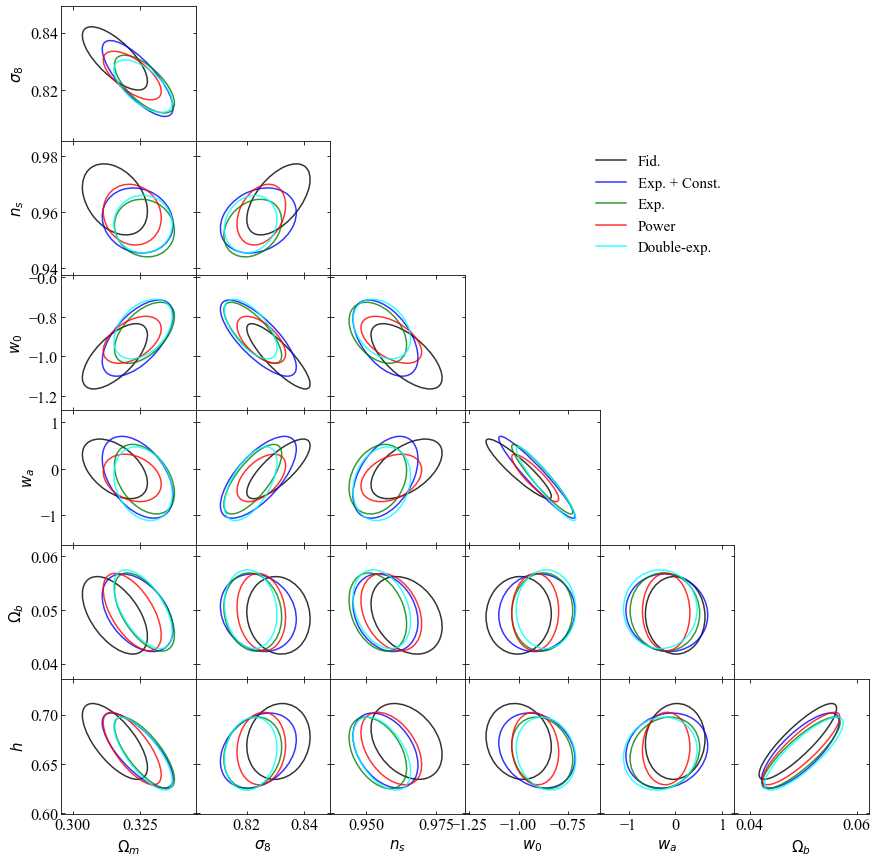

In [409]:
colors, labels = ['black', 'blue','green', 'red', 'cyan'], ['Fid.', 'Exp. + Const.', 'Exp.', 'Power', 'Double-exp.']

plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels


fig = plt.figure(figsize = (12,12))
fig.subplots_adjust(left=0.06, bottom=0.06, right=1.15, top=1.15, wspace=0.0, hspace=0.0)


# for count, params in enumerate([['omega_m', 'sigma_8'],
#                ['w_0', 'w_a']]):

for row in range(7):
    for col in range(row+1,7):
        params = [param_order[row], param_order[col]]

        #biases = [para_bias[params[0]], para_bias[params[1]]]
        fid = [(vals[i][params[0]], vals[i][params[1]]) for i in range(5)]

        es = []

        index1 = param_order.index(params[0])
        index2 = param_order.index(params[1])

        #print(index1, index2,cov1[index1][index1])

#             my_xlim = [fid[0] - 2.5*np.sqrt(cov[index1][index1]) , fid[0] + 2.5*np.sqrt(cov[index1][index1])]
#             my_ylim = [fid[1] - 2.5*np.sqrt(cov[index2][index2]) , fid[1] + 2.5*np.sqrt(cov[index2][index2])]
        xlim_low = [fid[i][0] - 2.5* np.sqrt(covs[i][index1][index1]) for i in range(5)]
        xlim_high = [fid[i][0] + 2.5* np.sqrt(covs[i][index1][index1]) for i in range(5)]

        ylim_low = [fid[i][1] - 2.5* np.sqrt(covs[i][index2][index2]) for i in range(5)]
        ylim_high = [fid[i][1] + 2.5* np.sqrt(covs[i][index2][index2]) for i in range(5)]

        my_xlim = [np.min(xlim_low),np.max(xlim_high)]
        my_ylim = [np.min(ylim_low),np.max(ylim_high)]

        #print(my_xlim, my_ylim)

        for i, matrix in enumerate(fishers):

            #print(matrix)
            e, (xlim, ylim) = plot_contours(marginalize(matrix, param_order.index(params[0]), param_order.index(params[1])),
                              sigmas=1,
                              fid=fid[i])
            e.set_edgecolor(colors[i])
            e.set_linewidth(1.5)
            e.set_facecolor('white')
            e.set_fill(False)
            #e.set_label(labels[i])
            e.set_alpha(0.8)
            es.append(e)
        ax = plt.subplot(7,7,7*col+row+1)
        subplot_number = 7*col+row+1

        for i, e in enumerate(es):
            ax.add_artist(e)

        ax.tick_params(
            axis='x',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=True,         # ticks along the top edge are off
            labelbottom=False)

        ax.tick_params(
            axis='y',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            left=True,      # ticks along the bottom edge are off
            right=True,         # ticks along the top edge are off
            labelleft=False)

        if subplot_number in list(range(43,49)):
            plt.xlabel(param_labels[param_order.index(params[0])],fontsize = 15)
            ax.tick_params(
                axis='x',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                bottom=True,      # ticks along the bottom edge are off
                top=True,         # ticks along the top edge are off
                labelbottom=True)
        if (subplot_number-1)%7==0:
            plt.ylabel(param_labels[param_order.index(params[1])],fontsize = 15)
            #plt.ticklabel_format(axis='y',style='scientific',scilimits=(0,3))
            ax.tick_params(
                axis='y',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                left=True,      # ticks along the bottom edge are off
                right=True,         # ticks along the top edge are off
                labelleft=True)
        #plt.title(str(subplot_number))
        #plt.xlim([-1.1, -0.9])
        plt.xlim(my_xlim)
        plt.ylim(my_ylim)
        #plt.legend(handles=es)

plt.subplot(7,7,19)
for i in range(len(colors)):
    plt.plot([0],[0],color = colors[i], linewidth = 1.5, alpha = 0.8,  label = labels[i] )
ax = plt.gca()
ax.legend(frameon = False,fontsize = 15)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.axis('off')

plt.savefig('cosmology_parameters.pdf', dpi = 300)
plt.show()

In [641]:
vals = [vals[0], vals[4]]
fishers = [fishers[0],fishers[4] ] 
covs = [covs[0], covs[4] ]

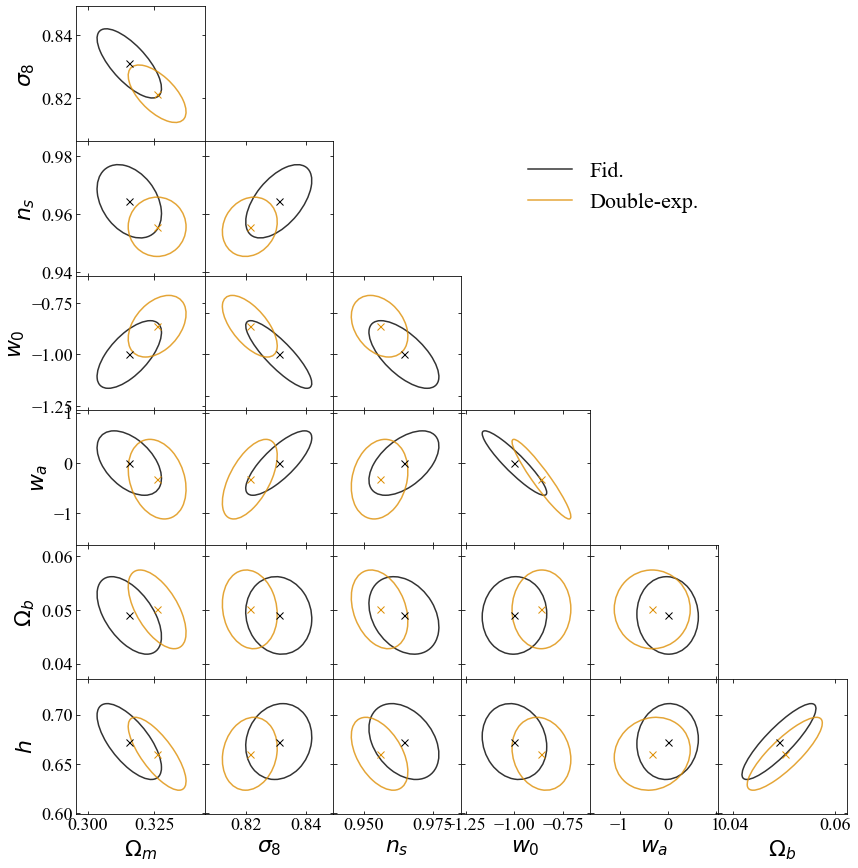

In [647]:
colors, labels = ['black', cmap[1]], ['Fid.',  'Double-exp.']

plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels


fig = plt.figure(figsize = (12,12))
fig.subplots_adjust(left=0.08, bottom=0.06, right=1.12, top=1.15, wspace=0.0, hspace=0.0)


# for count, params in enumerate([['omega_m', 'sigma_8'],
#                ['w_0', 'w_a']]):

for row in range(7):
    for col in range(row+1,7):
        params = [param_order[row], param_order[col]]

        #biases = [para_bias[params[0]], para_bias[params[1]]]
        fid = [(vals[i][params[0]], vals[i][params[1]]) for i in range(2)]

        es = []

        index1 = param_order.index(params[0])
        index2 = param_order.index(params[1])
        

        #print(index1, index2,cov1[index1][index1])

#             my_xlim = [fid[0] - 2.5*np.sqrt(cov[index1][index1]) , fid[0] + 2.5*np.sqrt(cov[index1][index1])]
#             my_ylim = [fid[1] - 2.5*np.sqrt(cov[index2][index2]) , fid[1] + 2.5*np.sqrt(cov[index2][index2])]
        xlim_low = [fid[i][0] - 2.5* np.sqrt(covs[i][index1][index1]) for i in range(2)]
        xlim_high = [fid[i][0] + 2.5* np.sqrt(covs[i][index1][index1]) for i in range(2)]

        ylim_low = [fid[i][1] - 2.5* np.sqrt(covs[i][index2][index2]) for i in range(2)]
        ylim_high = [fid[i][1] + 2.5* np.sqrt(covs[i][index2][index2]) for i in range(2)]

        my_xlim = [np.min(xlim_low),np.max(xlim_high)]
        my_ylim = [np.min(ylim_low),np.max(ylim_high)]

        #print(my_xlim, my_ylim)
        ax = plt.subplot(7,7,7*col+row+1)
        for i, matrix in enumerate(fishers):

            #print(matrix)
            e, (xlim, ylim) = plot_contours(marginalize(matrix, param_order.index(params[0]), param_order.index(params[1])),
                              sigmas=1,
                              fid=fid[i])
            e.set_edgecolor(colors[i])
            e.set_linewidth(1.5)
            e.set_facecolor('white')
            e.set_fill(False)
            #e.set_label(labels[i])
            e.set_alpha(0.8)
            es.append(e)
            plt.plot(fid[i][0] , fid[i][1] ,'x', markersize=7, color = colors[i])

        
        subplot_number = 7*col+row+1

        for i, e in enumerate(es):
            ax.add_artist(e)

        ax.tick_params(
            axis='x',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=True,         # ticks along the top edge are off
            labelbottom=False)

        ax.tick_params(
            axis='y',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            left=True,      # ticks along the bottom edge are off
            right=True,         # ticks along the top edge are off
            labelleft=False)

        if subplot_number in list(range(43,49)):
            plt.xlabel(param_labels[param_order.index(params[0])],fontsize = 22)
            ax.tick_params(
                axis='x',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                bottom=True,      # ticks along the bottom edge are off
                top=True,         # ticks along the top edge are off
                labelbottom=True,
                labelsize = 18)
        if (subplot_number-1)%7==0:
            plt.ylabel(param_labels[param_order.index(params[1])],fontsize = 22)
            #plt.ticklabel_format(axis='y',style='scientific',scilimits=(0,3))
            ax.tick_params(
                axis='y',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                left=True,      # ticks along the bottom edge are off
                right=True,         # ticks along the top edge are off
                labelleft=True,
                labelsize = 18)
        #plt.title(str(subplot_number))
        #plt.xlim([-1.1, -0.9])
        plt.xlim(my_xlim)
        plt.ylim(my_ylim)
        #plt.legend(handles=es)

plt.subplot(7,7,19)
for i in range(len(colors)):
    plt.plot([0],[0],color = colors[i], linewidth = 1.5, alpha = 0.8,  label = labels[i] )
ax = plt.gca()
ax.legend(frameon = False,fontsize = 22)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.axis('off')

plt.savefig('cosmology_parameters.pdf', dpi = 300)
plt.show()

In [438]:

with open('pickle/raw_results.pkl','rb') as f:
    raw_results = pickle.load(f)[0]
    

def expconst(x,amp, scale,level):
    return amp*np.exp(-scale*x)+level


def powerlaw(x,amp, b):
    return amp * np.power(x, -b)


def explaw(x,amp,scale):
    return amp*np.exp(-scale*x)

def twoexp(x, amp1, scale1, amp2, scale2):
    return amp1*np.exp(-scale1*x)+amp2*np.exp(-scale2*x)


In [439]:
raw_results

{'r': array([1.25686456e-01, 1.90767890e-01, 2.89295041e-01, 4.38886000e-01,
        6.64510789e-01, 1.00700950e+00, 1.52532423e+00, 2.31005868e+00,
        3.49768234e+00, 5.29506965e+00, 8.01676656e+00, 1.21353927e+01,
        1.83668332e+01, 2.77925445e+01, 4.20498231e+01, 6.35868888e+01,
        9.60966629e+01, 1.44993571e+02, 2.17646923e+02, 3.23795896e+02]),
 'xip_raw_00': array([ 5.43977385e-05,  5.29832094e-05,  5.15072222e-05,  4.95547300e-05,
         4.66128885e-05,  4.14057309e-05,  3.29814903e-05,  2.37788193e-05,
         1.77734020e-05,  1.25300948e-05,  8.89976738e-06,  6.34100645e-06,
         4.73053538e-06,  3.31220779e-06,  2.22849350e-06,  1.54372530e-06,
         9.79680176e-07,  7.14235093e-07,  3.31078939e-07, -5.97303583e-07]),
 'xim_raw_00': array([ 6.10645431e-08,  1.90791933e-07, -9.89151473e-08,  2.72566714e-08,
         1.07840770e-07,  2.48845601e-07,  1.08393834e-06,  3.17402902e-06,
         4.76112706e-06,  4.39795984e-06,  3.97687156e-06,  3.23509600e

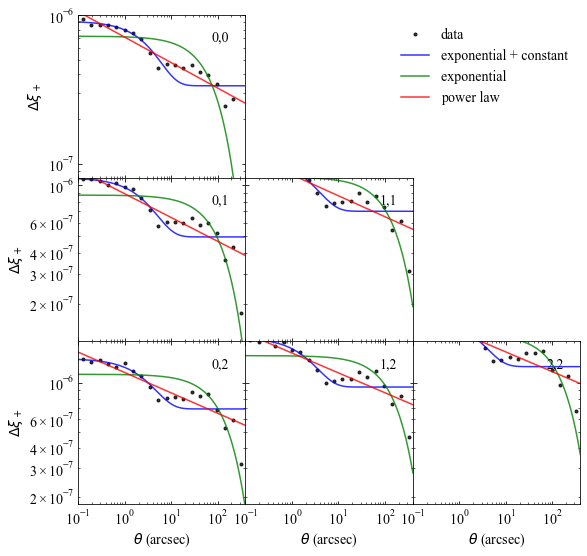

In [204]:
fig = plt.figure(figsize = (9,9))
epsilon = 0.00001
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.0)

ylim = [[8e-8,1e-6],[1.2e-7,1.1e-6 ],[1.8e-7,1.8e-6]]

for i in range(n_tomo):
    for j in range(i,n_tomo):
        
        ax = plt.subplot(n_tomo,n_tomo,i+n_tomo*j+1)
        r = raw_results['r']
        xip_raw = raw_results['xip_raw_'+str(i)+str(j)]
        xim_raw = raw_results['xim_raw_'+str(i)+str(j)]

        xip_obs = obs_results['xip_obs_'+str(i)+str(j)]
        xim_obs = obs_results['xim_obs_'+str(i)+str(j)]


        delta_xip = np.abs(xip_raw - xip_obs)
        delta_xim = np.abs(xim_raw - xim_obs)
        plt.plot(r, delta_xip, '.',  label = r'data', color = 'black', alpha = 0.8)
        
        
        x_fit = np.arange(0.1,400,0.1)
        
        
        popt1, _ = curve_fit(expconst,r,delta_xip)
        y_fit1 = expconst(x_fit,popt1[0], popt1[1],popt1[2])
        plt.plot(x_fit,y_fit1, label = r'exponential + constant', color = 'blue', alpha = 0.8)
        

        popt3, _ = curve_fit(explaw,r,delta_xip)
        y_fit3 = explaw(x_fit,popt3[0], popt3[1])
        plt.plot(x_fit,y_fit3, label = r'exponential ', color = 'green', alpha = 0.8)
        
        popt2, _ = curve_fit(powerlaw,r,delta_xip)
        y_fit2 = powerlaw(x_fit,popt2[0], popt2[1])
        plt.plot(x_fit,y_fit2, label = r'power law', color = 'red', alpha = 0.8)
        
        
        ax.tick_params(
            axis='x',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=True,         # ticks along the top edge are off
            labelbottom=False)

        ax.tick_params(
            axis='y',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            left=True,      # ticks along the bottom edge are off
            right=True,         # ticks along the top edge are off
            labelleft=False)

        #ax.tick_params(axis="y",direction="in")



        if j==2:
            plt.xlabel(r"$\theta$ (arcsec)")
            ax.tick_params(
                axis='x',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                bottom=True,      # ticks along the bottom edge are off
                top=True,         # ticks along the top edge are off
                labelbottom=True)
           
        if i==0:
        
            plt.ylabel(r'$\Delta \xi_+$')
            #plt.ticklabel_format(axis='y',style='scientific',scilimits=(0,3))
            ax.tick_params(
                axis='y',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                left=True,      # ticks along the bottom edge are off
                right=True,         # ticks along the top edge are off
                labelleft=True)

        plt.title(str(i)+','+str(j), y = 0.8, x = 0.85)
        
        plt.ylim(ylim[j])
        plt.xlim([0.1,400])
        plt.xscale('log')
        plt.yscale('log')
        
        

plt.subplot(3,3,3)
plt.plot([],[],'.',label = r'data', color = 'black', alpha = 0.8)
plt.plot([0],[0],label = r'exponential + constant', color = 'blue', alpha = 0.8)
plt.plot([0],[0],label = r'exponential ', color = 'green', alpha = 0.8)
plt.plot([0],[0],label = r'power law', color = 'red', alpha = 0.8)



plt.legend(frameon = False)     
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.axis('off')
        
        
plt.savefig('xi+fitting.pdf',dpi = 300)

0 0
0 1
0 2
1 1
1 2
2 2


/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_6505/233388302.py:17: RuntimeWarning: overflow encountered in exp
  return amp1*np.exp(-scale1*x)+amp2*np.exp(-scale2*x)
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_6505/233388302.py:17: RuntimeWarning: overflow encountered in exp
  return amp1*np.exp(-scale1*x)+amp2*np.exp(-scale2*x)
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_6505/233388302.py:17: RuntimeWarning: overflow encountered in exp
  return amp1*np.exp(-scale1*x)+amp2*np.exp(-scale2*x)
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_6505/233388302.py:17: RuntimeWarning: overflow encountered in exp
  return amp1*np.exp(-scale1*x)+amp2*np.exp(-scale2*x)
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_6505/233388302.py:17: RuntimeWarning: overflow encountered in exp
  return amp1*np.exp(-scale1*x)+amp2*np.exp(-scale2*x)
/var/folders/cw/jqrw84tx2jb5fj92jz93n91r0000gn/T/ipykernel_6505/233388302.py:17: RuntimeWarning: ove

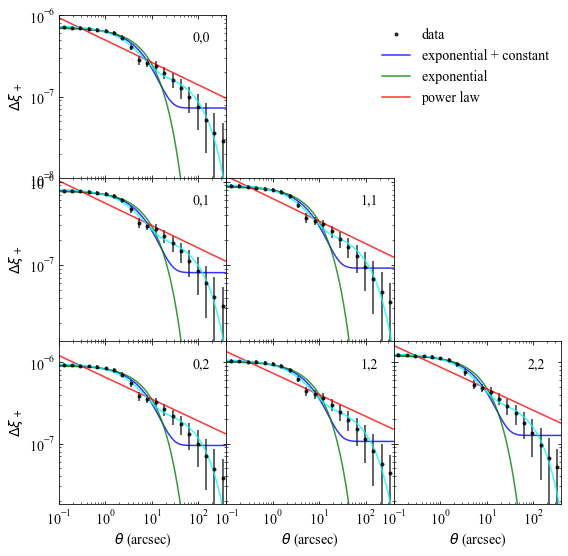

In [264]:
fig = plt.figure(figsize = (9,9))
epsilon = 0.00001
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.0)

ylim = [[1e-8,1e-6],[1.2e-8,1.1e-6 ],[1.8e-8,1.8e-6]]

for i in range(n_tomo):
    for j in range(i,n_tomo):
        
        print(i,j)
        ax = plt.subplot(n_tomo,n_tomo,i+n_tomo*j+1)
        r = diff_results['r']


        delta_xip = diff_results['xip_diff_'+str(i)+str(j)]
        delta_xim = diff_results['xip_diff_'+str(i)+str(j)]
        
        cov_xip = diff_results['cov_diff_'+str(i)+str(j)][:20,:20] 
        
        errorbar_xip = np.sqrt(np.diag(cov_xip))
        #errorbar_xim = np.diag(diff_results['cov_diff_'+str(i)+str(j)][20:,20:])
        
        
        


        
        plt.errorbar(r, delta_xip,errorbar_xip, fmt= '.',  label = r'data', color = 'black', alpha = 0.8)
        
        
        x_fit = np.arange(0.1,400,0.1)
        
        
        popt1, pcov1 = curve_fit(expconst,r,delta_xip, sigma = errorbar_xip)
        y_fit1 = expconst(x_fit,popt1[0], popt1[1],popt1[2])
        plt.plot(x_fit,y_fit1, label = r'exponential + constant', color = 'blue', alpha = 0.8)
        
        #print(popt1, pcov1)

        popt3, _ = curve_fit(explaw,r,delta_xip,sigma = errorbar_xip)
        y_fit3 = explaw(x_fit,popt3[0], popt3[1])
        plt.plot(x_fit,y_fit3, label = r'exponential ', color = 'green', alpha = 0.8)
        
        popt2, _ = curve_fit(powerlaw,r,delta_xip,sigma = errorbar_xip)
        y_fit2 = powerlaw(x_fit,popt2[0], popt2[1])
        plt.plot(x_fit,y_fit2, label = r'power law', color = 'red', alpha = 0.8)
        
        popt4, _ =  curve_fit(twoexp, r, delta_xip, sigma = errorbar_xip)
        y_fit4 = twoexp(x_fit, *popt4)
        plt.plot(x_fit,y_fit4, label = r'power law', color = 'cyan', alpha = 0.8)
        

        ax.tick_params(
            axis='x',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=True,         # ticks along the top edge are off
            labelbottom=False)

        ax.tick_params(
            axis='y',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            left=True,      # ticks along the bottom edge are off
            right=True,         # ticks along the top edge are off
            labelleft=False)

        #ax.tick_params(axis="y",direction="in")



        if j==2:
            plt.xlabel(r"$\theta$ (arcsec)")
            ax.tick_params(
                axis='x',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                bottom=True,      # ticks along the bottom edge are off
                top=True,         # ticks along the top edge are off
                labelbottom=True)
           
        if i==0:
        
            plt.ylabel(r'$\Delta \xi_+$')
            #plt.ticklabel_format(axis='y',style='scientific',scilimits=(0,3))
            ax.tick_params(
                axis='y',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                left=True,      # ticks along the bottom edge are off
                right=True,         # ticks along the top edge are off
                labelleft=True)

        plt.title(str(i)+','+str(j), y = 0.8, x = 0.85)
        
        plt.xlim([0.1,400])
        plt.ylim(ylim[j])
        plt.xscale('log')
        plt.yscale('log')
        
        

plt.subplot(3,3,3)
plt.plot([],[],'.',label = r'data', color = 'black', alpha = 0.8)
plt.plot([0],[0],label = r'exponential + constant', color = 'blue', alpha = 0.8)
plt.plot([0],[0],label = r'exponential ', color = 'green', alpha = 0.8)
plt.plot([0],[0],label = r'power law', color = 'red', alpha = 0.8)



plt.legend(frameon = False)     
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.axis('off')
        
        
plt.savefig('xi+fitting.pdf',dpi = 300)

In [552]:
with open('pickle/cosmology_multiplicative.pkl','rb') as f:
    bias_ell,vals,fisher, cov , param_order, para_bias = pickle.load(f)

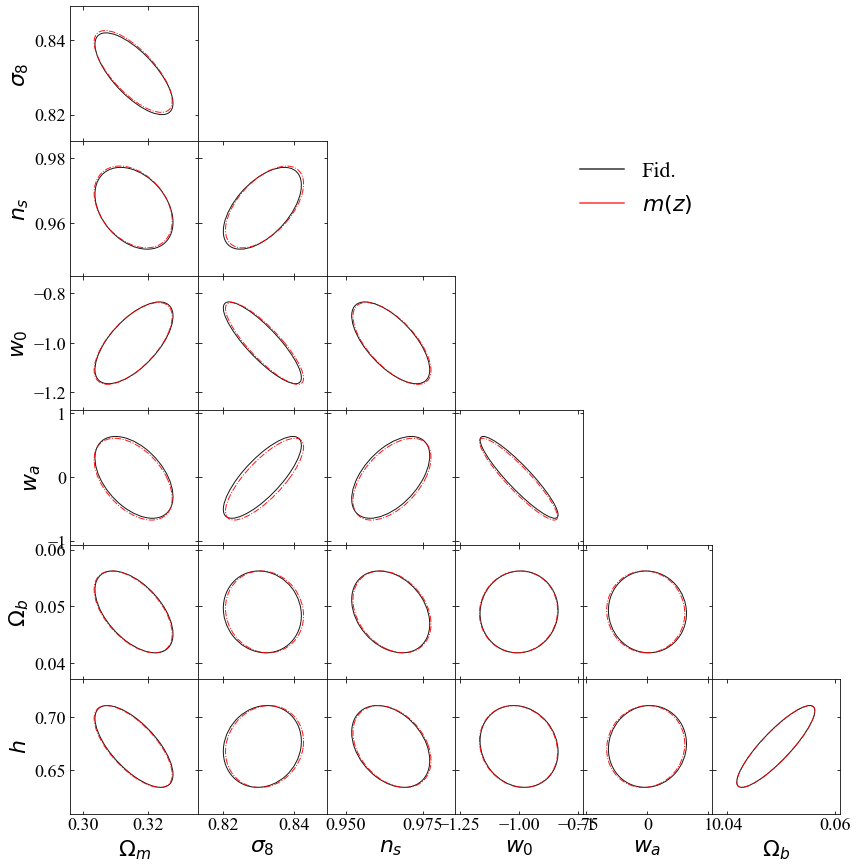

In [553]:




colors = ['black', 'red']
linestyle = ['-', '-.']

xlim_range = [[0.3,0.4],[-2.5,-0.75]]
ylim_range = [[0.6,0.85],[-1,4.0]]
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels


fig = plt.figure(figsize = (12,12))
fig.subplots_adjust(left=0.08, bottom=0.06, right=1.12, top=1.15, wspace=0.0, hspace=0.0)


# for count, params in enumerate([['omega_m', 'sigma_8'],
#                ['w_0', 'w_a']]):

for row in range(7):
    for col in range(row+1,7):
        params = [param_order[row], param_order[col]]

        labels = ['Fid.', r'$m(z)$']
        biases = [para_bias[params[0]], para_bias[params[1]]]
        fid = (vals[params[0]], vals[params[1]])
        es = []

        index1 = param_order.index(params[0])
        index2 = param_order.index(params[1])

        my_xlim = [fid[0] - 2.5*np.sqrt(cov[index1][index1]) , fid[0] + 2.5*np.sqrt(cov[index1][index1])]
        my_ylim = [fid[1] - 2.5*np.sqrt(cov[index2][index2]) , fid[1] + 2.5*np.sqrt(cov[index2][index2])]


        for i, matrix in enumerate([fisher, fisher]):
            if i==1:
                #print('changing fid')
                fid = (fid[0]+biases[0], fid[1]+biases[1])

            e, (xlim, ylim) = plot_contours(marginalize(matrix, param_order.index(params[0]), param_order.index(params[1])),
                              sigmas=1,
                              fid=fid)
            e.set_facecolor(colors[i])
            e.set_edgecolor(colors[i])
            e.set_label(labels[i])
            e.set_fill(False)
            e.set_linestyle(linestyle[i])
            e.set_alpha(0.9)
            es.append(e)
        ax = plt.subplot(7,7,7*col+row+1)
        subplot_number = 7*col+row+1

        for i, e in enumerate(es):
            ax.add_artist(e)

        ax.tick_params(
            axis='x',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=True,         # ticks along the top edge are off
            labelbottom=False)

        ax.tick_params(
            axis='y',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            left=True,      # ticks along the bottom edge are off
            right=True,         # ticks along the top edge are off
            labelleft=False)

        if subplot_number in list(range(43,49)):
            plt.xlabel(param_labels[param_order.index(params[0])], fontsize = 22)
            ax.tick_params(
                axis='x',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                bottom=True,      # ticks along the bottom edge are off
                top=True,         # ticks along the top edge are off
                labelbottom=True,
                labelsize = 18)
        if (subplot_number-1)%7==0:
            plt.ylabel(param_labels[param_order.index(params[1])], fontsize = 22)
            #plt.ticklabel_format(axis='y',style='scientific',scilimits=(0,3))
            ax.tick_params(
                axis='y',          # changes apply to the x-axis
                direction = 'in',
                which='both',      # both major and minor ticks are affected
                left=True,      # ticks along the bottom edge are off
                right=True,         # ticks along the top edge are off
                labelleft=True,
                labelsize = 18)
        #plt.title(str(subplot_number))
        #plt.xlim([-1.1, -0.9])
        plt.xlim(my_xlim)
        plt.ylim(my_ylim)
        #plt.legend(handles=es)
        
plt.subplot(7,7,19)
plt.plot([0],[0],color = colors[0], linewidth = 1.5, alpha = 0.8,  label = labels[0] )
plt.plot([0],[0],color = colors[1], linewidth = 1.5, alpha = 0.8,  label = labels[1] )

ax = plt.gca()
ax.legend(frameon = False,fontsize = 22)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.axis('off')


plt.savefig('cosmology_multiplicative.pdf',dpi = 300)
plt.show()

[-1.678373990991254e-07, -0.00010061136331057508]